1.Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Hacer un resumen de la sección extracción de caracteríticas (Features extraction) y discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad (10%)

* Ver documento anexo.



2. Base de datos. Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección.




La base de datos seleccionada fue la obtenida en el proyecto 3, esta elección se hizo debido a que al realizar pruebas estadísticas no paramétricas tanto en el conjunto de datos filtrado por los autores como los filtrados en el proyecto 3, se obtuvo por medio de la prueba de U Mann Withney que los datos usados en el proyecto 2 no se encontraba una diferencia significativa entre los grupos AFIB y SB, mientras que en los datos del proyecto 3 por medio de la misma prueba se obtuvo que existe una diferencia significativa entre los grupos AFIB y SB, por lo que es posible diferenciar de mejor manera ambas patologías y esto favorece los análisis que se realizarán en este proyecto puesto que se pretenden determinar características diferenciales entre estas enfermedades.

De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx De estos registros los análisis para el presente proyecto deben hacerse en la derivación II

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from random import randint

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
file_path_AFIB = '/content/drive/MyDrive/Biosenales/df_AFIB.xlsx'
datos_AFIB = pd.read_excel(file_path_AFIB, sheet_name='Sheet1')    # Extraer datos AFIB
file_path_SB = '/content/drive/MyDrive/Biosenales/df_SB.xlsx'
datos_SB = pd.read_excel(file_path_SB, sheet_name='Sheet1')    # Extraer datos SB

In [ ]:
file_path_fMP = '/content/drive/MyDrive/Biosenales/df.xlsx'
datos_fMP = pd.read_excel(file_path_fMP, sheet_name='Sheet1')    # Extraer datos frecuencia de maxima potencia

In [ ]:
# Conversión de datos a array
datos_AFIB=np.array(datos_AFIB)
datos_SB=np.array(pd.DataFrame(datos_SB))
datos_fMP=np.array(pd.DataFrame(datos_fMP))

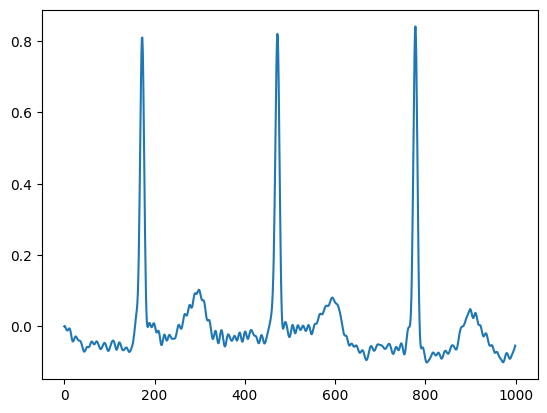

In [ ]:
plt.plot(datos_AFIB[0][0:1000]) # Visualización de un segmento de una de las señales


3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

  **El minitutorial realizado se encuentra en el documento adjunto.**


4. Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3 (5%).


In [ ]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

Ejemplo 1

In [ ]:
# Procesamiento de la señal ECG
signals, info = nk.ecg_process(datos_AFIB[1], sampling_rate=500)

[0.4399045 0.4399045 0.4399045 ... 0.        0.        0.       ]


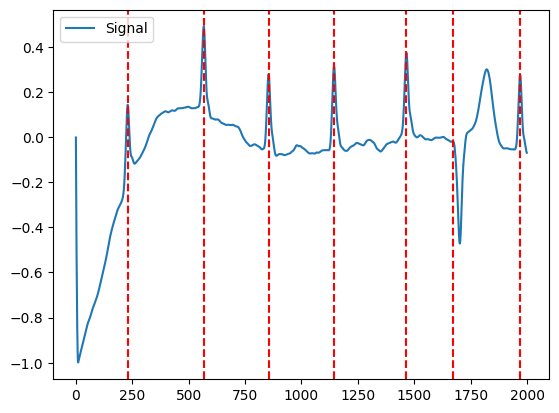

In [ ]:
# Extraer señal ECG limpia y los picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Ver los picos R en la señal ECG
plot = nk.events_plot(rpeaks[0:7], cleaned_ecg[0:2000])
#Evaluación de calidad
a=nk.ecg_quality(cleaned_ecg, rpeaks = None , sampling_rate = 500 , method = 'averageQRS' , approach = None)
print(a)

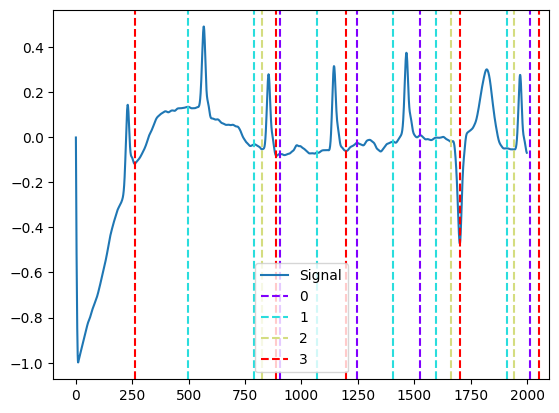

In [ ]:
# Extraer los picos T, P, Q y S
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]
q_peaks = info["ECG_Q_Peaks"]
s_peaks = info["ECG_S_Peaks"]
# Ver los picos T, P, Q y S
nk.events_plot([t_peaks[0:7], p_peaks[0:7], q_peaks[0:7], s_peaks[0:7]], cleaned_ecg[0:2000])

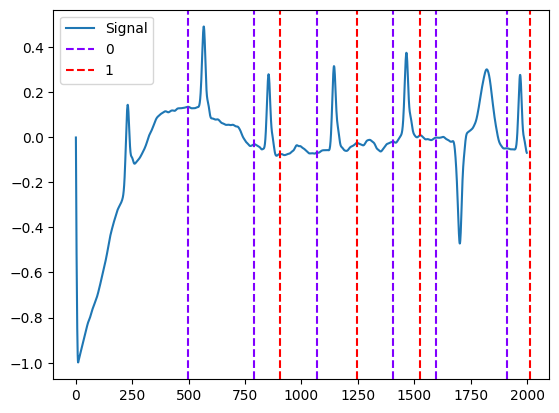

In [ ]:
# Se delinea el complejo
signals, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500)
# Se grafican los picos P y los picos T
nk.events_plot([waves["ECG_P_Peaks"][0:7], waves["ECG_T_Peaks"][0:7]], cleaned_ecg[0:2000])

In [ ]:
picos = nk.signal_findpeaks(cleaned_ecg)

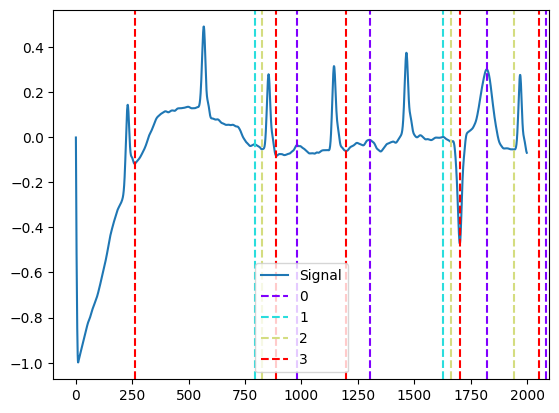

In [ ]:
# Delinear el complejo QRS
# Encontrar picos PQST
_, waves_peak = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500, method="peak")
# Ver los 3 primeros R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:7],
                       waves_peak['ECG_P_Peaks'][:7],
                       waves_peak['ECG_Q_Peaks'][:7],
                       waves_peak['ECG_S_Peaks'][:7]], cleaned_ecg[:2000])

In [ ]:
# Frecuencia media
# Identificacion de eventos
df, info = nk.bio_process(ecg=cleaned_ecg, sampling_rate=500)
# Identificacion de eventos
events = nk.events_find(cleaned_ecg, threshold_keep='below', event_conditions=None)
# Identificacion de epocas de acuerdo a los eventos
epochs = nk.epochs_create(df, events, sampling_rate=500, epochs_start=-0.1, epochs_end=1.9)
# Analisis de las epocas
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=500)

In [ ]:
analyze_epochs

,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,2,90.361446,14.168171,-1.340674,2.933903,5.681880,1.705806,1.131231,-14.828871,2.589952,0.913995,NaN,0.000000,NaN,0.000000,0.313388
2,2,1692,73.550369,36.743748,-14.026560,6.943918,18.447628,1.771872,0.554655,-12.852200,-8.272742,0.929835,0.0,0.303071,0.0,0.339713,0.695353
3,3,2832,92.240978,10.851806,-2.420619,1.649610,4.790858,1.409510,0.158258,9.482219,-5.133328,0.475579,0.0,0.424293,0.0,0.493506,0.899622


Ejemplo 2

In [ ]:
# Procesamiento de la señal ECG
signals, info = nk.ecg_process(datos_SB[10], sampling_rate=500)

[0. 0. 0. ... 0. 0. 0.]


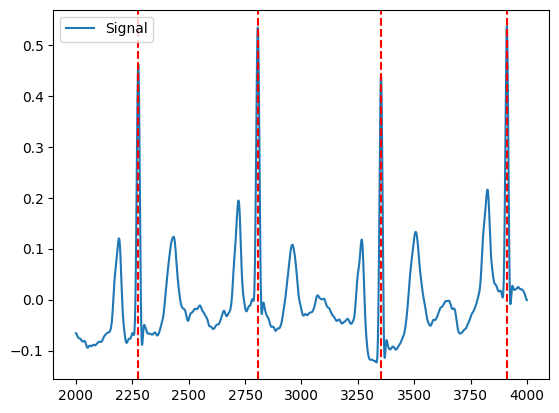

In [ ]:
# Extraer señal ECG limpia y los picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Ver los picos R en la señal ECG
plot = nk.events_plot(rpeaks[3:7], cleaned_ecg[2000:4000])
#Evaluación de calidad
a=nk.ecg_quality(cleaned_ecg, rpeaks = None , sampling_rate = 500 , method = 'averageQRS' , approach = None)
print(a)

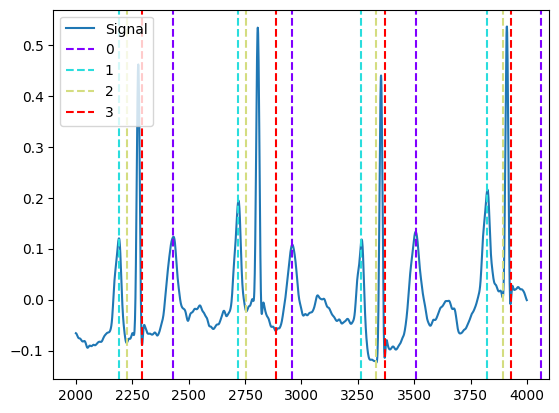

In [ ]:
# Extraer los picos T, P, Q y S
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]
q_peaks = info["ECG_Q_Peaks"]
s_peaks = info["ECG_S_Peaks"]
# Ver los picos T, P, Q y S
nk.events_plot([t_peaks[3:7], p_peaks[3:7], q_peaks[3:7], s_peaks[3:7]], cleaned_ecg[2000:4000])

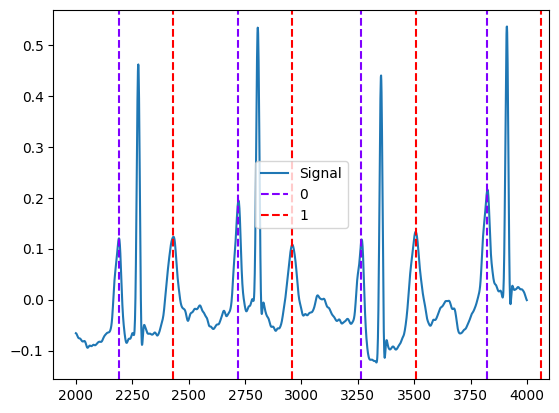

In [ ]:
# Se delinea el complejo
signals, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500)
# Se grafican los picos P y los picos T
nk.events_plot([waves["ECG_P_Peaks"][3:7], waves["ECG_T_Peaks"][3:7]], cleaned_ecg[2000:4000])

In [ ]:
picos = nk.signal_findpeaks(cleaned_ecg)
print(picos.keys())

dict_keys(['Peaks', 'Distance', 'Height', 'Width', 'Onsets', 'Offsets'])


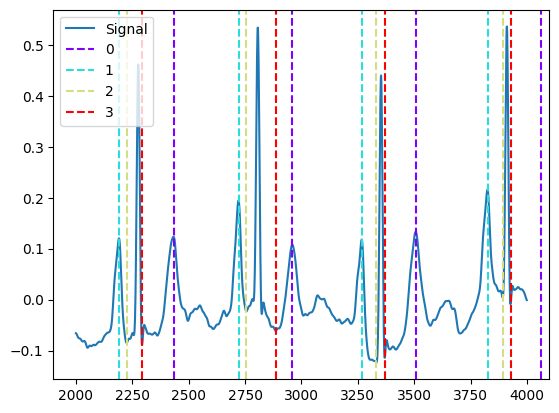

In [ ]:
# Delinear el complejo QRS
# Encontrar picos PQST
_, waves_peak = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500, method="peak")
# Ver los 3 primeros R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][3:7],
                       waves_peak['ECG_P_Peaks'][3:7],
                       waves_peak['ECG_Q_Peaks'][3:7],
                       waves_peak['ECG_S_Peaks'][3:7]], cleaned_ecg[2000:4000])

In [ ]:
# Frecuencia media
# Identificacion de eventos
df, info = nk.bio_process(ecg=cleaned_ecg, sampling_rate=500)
# Identificacion de eventos
events = nk.events_find(cleaned_ecg, threshold_keep='below', event_conditions=None)
# Identificacion de epocas de acuerdo a los eventos
epochs = nk.epochs_create(df, events, sampling_rate=500, epochs_start=-0.1, epochs_end=1.9)
# Analisis de las epocas
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=500)

In [ ]:
analyze_epochs

,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,3,54.744526,0.675906,0.0,0.129604,0.214954,1.9,0.002102,-0.529923,0.100065,0.940825,NaN,0.0,NaN,0.0,0.841478



5. Con las características que extrae el neurokit y las discutidas en el punto 1 generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3 (10%). No incluir más de 15 características ni menos de 5, justificar la selección (5%).


Características:
1.  Frecuencia cardíaca Media .
2.  Desviación estándar de la varianza de la frec cardiaca (HRV)
3.  Inverso de la longitud media de los segmentos de aceleración/deceleración (IALS).


Altura de los picos en las ondas:
4. Altura Onda P
5. Altura Onda R
6. Altura Onda T

Duración (ancho) de los intervalos entre los picos:
7.  Intervalo PR, el
8.  Intervalo QT y la
9.  Duración del complejo QRS.


10.  Prominencia del complejo QRS respecto a los valles.
11.  Media de los intervalos RR.
12.  Varianza de los intervalos RR

Conteo de picos:
13. Número de picos globales.
14. Número de picos locales.


15. Frec de maxima potencia


CARGAR LA  SEÑAL Y UTILIZAR LAS FUNCIONES PROCESS Y ANALYZE PARA EXTRAER CARACTERÍSTICAS:

In [ ]:
ecg_signal = (datos_AFIB[0])
# Procesar la señal de ECG
signals, info = nk.ecg_process(ecg_signal, sampling_rate=500)
# Analizar la señal de ECG para extraer características
analysis = nk.ecg_analyze(signals, sampling_rate=500)
cleaned_ecg = signals["ECG_Clean"]


/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


Frecuencia cardíaca Media , desviación estándar de la varianza de la frec cardiaca (HRV), inverso de la longitud media de los segmentos de aceleración/deceleración (IALS)

In [ ]:
print("1. Frecuencia cardíaca media: ",analysis['ECG_Rate_Mean'][0], "\n2. Desviación estandar de la varianza frecuencia cardíaca: ",analysis['HRV_SD1'][0])
print("3. IALS: ",analysis['HRV_IALS'][0])  # VER varianzas no lineales: https://neuropsychology.github.io/NeuroKit/functions/hrv.html

1. Frecuencia cardíaca media:  92.87781114612291 
2. Desviación estandar de la varianza frecuencia cardíaca:  [[54.24800599]]
3. IALS:  [[0.92307692]]


•	Altura de los picos en las ondas P, QRS y T.

In [ ]:
r_peaks = info["ECG_R_Peaks"] ; p_peaks = info["ECG_P_Peaks"] ; t_peaks = info["ECG_T_Peaks"]  # Da el punto (tiempo) en que se presentaron los picos


r_heights = ecg_signal[r_peaks]     ;  r_heights_mean = np.mean(r_heights)          # Da la amplitud!, así que saco promedio de cada onda.
p_heights = ecg_signal[p_peaks]     ;  p_heights_mean = np.mean(p_heights)
t_heights = ecg_signal[t_peaks]     ;  t_heights_mean = np.mean(t_heights)

print("Altura promedio de los picos:", "\n4. P: ",p_heights_mean,"\n5. R: " ,r_heights_mean, "\n6. T: ",t_heights_mean)


Altura promedio de los picos: 
4. P:  -0.03919507266779111 
5. R:  0.8401295977031997 
6. T:  0.05856303524163313


•	Duración de los intervalos (ancho) entre los picos. Intervalo PR, el intervalo QT y la duración del complejo QRS.

In [ ]:
t_peaks_mod = [];
q_peaks = np.array (info["ECG_Q_Peaks"])
q_peakss = [valor for valor in q_peaks if not np.isnan(valor)]        # No tener en cuenta los nan

for i in range (0,len(q_peaks)):                                      # Como la funcion no toma todos los valores de q_peaks, se utilizan sólo los que no son nan
  #if str(i) == 'nan':
  if str(q_peaks[i]) !=  'nan':
    t_peaks_mod.append(t_peaks[i])
t_peaks_mod=np.array(t_peaks_mod)

pr_interval = np.mean((r_peaks)-(p_peaks))  /500                      # Intervalo promedio P-R
qt_interval = np.mean((t_peaks_mod)-(q_peakss)) /500                  # Intervalo promedio Q-T

print("7. Ancho medio P-R: ", pr_interval,"segundos","\n8. Ancho medio Q-T: ",qt_interval,"segundos")
# Para el complejo QRS
P_offset = info['ECG_P_Offsets']  ; T_onset = info['ECG_T_Onsets']    # Para este, no encontré el onset de Q y el offset de S, entonces tomé P y T, se pueden tomar los picos Q-S

PT_width = (np.mean(T_onset)-np.mean(P_offset))/500                   # Convertir a segundos
print("9. Duración aproximada complejo QRS con segmento ST: ",PT_width,"segundos")


7. Ancho medio P-R:  0.1264 segundos 
8. Ancho medio Q-T:  0.3075 segundos
9. Duración aproximada complejo QRS con segmento ST:  0.2598666666666668 segundos


•	Prominencia complejo QRS respecto a los valles.



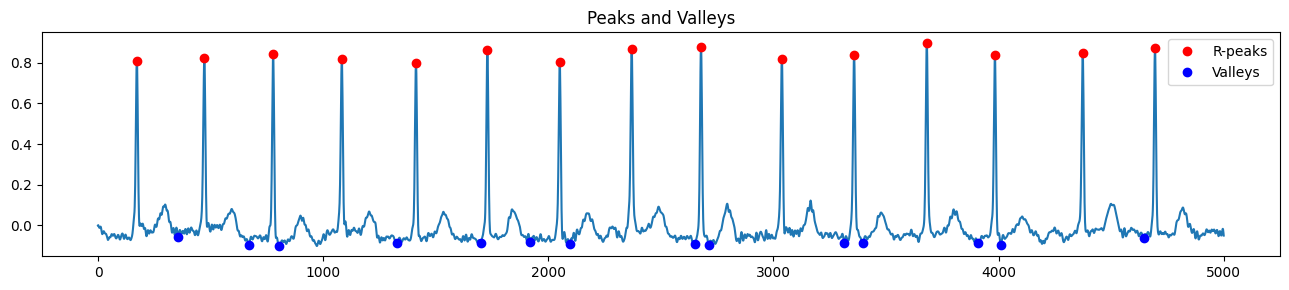

[0.8654744  0.91492377 0.94262893 0.90046253 0.88158088 0.94576295
 0.89308983 0.95881294 0.97088264 0.9033875  0.92429001 0.98290978
 0.93478409 0.90458093]
10. Media de las prominencias complejo QRS:  0.9231122263087104


In [ ]:
# Identify valleys
valleys = []
for i in range(1, (len(r_peaks))):
    segment = ecg_signal[r_peaks[i-1]:r_peaks[i]]
    valley_index = np.argmin(segment) + r_peaks[i-1]
    valleys.append(valley_index)
# Calculate prominence and depth
prominences = ecg_signal[r_peaks][0:len(r_peaks)-1] - ecg_signal[valleys]

plt.figure(figsize=(13, 3))
# Peaks and valleys
plt.subplot(1, 1, 1)  ; plt.plot(ecg_signal)
plt.plot(r_peaks, ecg_signal[r_peaks], 'ro', label='R-peaks') ; plt.plot(valleys, ecg_signal[valleys], 'bo', label='Valleys')
plt.legend()  ; plt.title('Peaks and Valleys')

plt.tight_layout(); plt.show()
print(prominences)
print("10. Media de las prominencias complejo QRS: ", np.mean(prominences))


•	Media y la varianza de los intervalos RR.


In [ ]:
rr_intervals = np.diff(r_peaks) / 1000  # Convertir a segundos
rr_mean = np.mean(rr_intervals)
rr_variance = np.var(rr_intervals)

print("11. Media intervalos RR: ", rr_mean, "\n12. Varianza Intervalos RR: ", rr_variance)


11. Media intervalos RR:  0.32307142857142856 
12. Varianza Intervalos RR:  0.0005463520408163266


•	Conteo de picos en un período de tiempo determinado.


Text(0, 0.5, 'Amplitud')

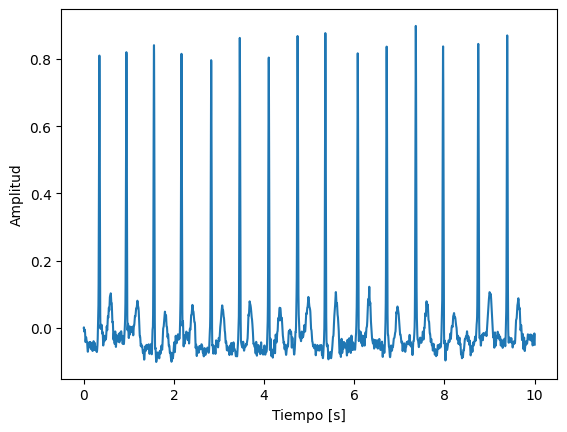

In [ ]:
t=len(datos_AFIB[0])/500
tiempo = np.linspace(0, t, len(datos_AFIB[0]))
plt.plot(tiempo,datos_AFIB[0]);plt.xlabel("Tiempo [s]");plt.ylabel("Amplitud")

In [ ]:
print(r_peaks)
time_period = 3 # segundos
peak_count_R = len(r_peaks[(r_peaks / 500) < time_period])
print(peak_count_R)

print(p_peaks)
p_peaks_array = np.array(p_peaks)
time_period = 3 # segundos
peak_count_P = len(p_peaks_array[(p_peaks_array / 500) < time_period])
print(peak_count_P)

print(t_peaks)
t_peaks_array = np.array(t_peaks)
time_period = 3 # segundos
peak_count_T = len(t_peaks_array[(t_peaks_array / 500) < time_period])
print(peak_count_T)


[ 172  472  778 1083 1412 1729 2051 2370 2678 3037 3358 3681 3984 4374
 4695]
5
[107, 415, 717, 1021, 1339, 1660, 2001, 2283, 2618, 2969, 3303, 3612, 3945, 4304, 4632]
5
[296, 594, 900, 1136, 1535, 1764, 2174, 2490, 2795, 3164, 3479, 3730, 4105, 4503, 4818]
4


In [ ]:
info = nk.signal_findpeaks(datos_AFIB[0])
info['Peaks']

array([   1,   11,   25,   51,   61,   72,   89,  108,  122,  137,  173,
        189,  198,  208,  222,  233,  242,  254,  267,  278,  290,  298,
        308,  320,  335,  348,  363,  377,  389,  401,  414,  437,  472,
        490,  506,  518,  529,  541,  567,  581,  594,  623,  636,  647,
        660,  680,  695,  720,  736,  747,  778,  794,  817,  829,  844,
        860,  899,  911,  920,  934,  947,  958,  980, 1002, 1019, 1044,
       1057, 1083, 1099, 1114, 1127, 1137, 1146, 1160, 1177, 1192, 1204,
       1214, 1229, 1245, 1259, 1270, 1282, 1288, 1305, 1323, 1339, 1359,
       1371, 1412, 1428, 1451, 1468, 1482, 1496, 1534, 1543, 1577, 1593,
       1609, 1622, 1635, 1648, 1660, 1670, 1693, 1729, 1767, 1786, 1798,
       1826, 1839, 1885, 1898, 1912, 1926, 1935, 1948, 1966, 1980, 2003,
       2019, 2051, 2071, 2087, 2103, 2113, 2128, 2156, 2172, 2178, 2194,
       2220, 2232, 2259, 2274, 2285, 2297, 2313, 2324, 2348, 2370, 2398,
       2416, 2427, 2446, 2467, 2490, 2547, 2563, 25

In [ ]:
print("13. Conteo picos globales: ", (peak_count_P+peak_count_R+peak_count_T))
print("14. Conteo picos locales: ", (len(info['Peaks'])))

13. Conteo picos globales:  14
14. Conteo picos locales:  285


Frecuencia de maxima potencia proyecto 3

In [ ]:
def Plot_Frec_MaxPot(senal,str):
  Fs=500
  nperseg=1000
  noverlap = int(nperseg/2)
  f, Pxx_den = signal.welch(np.array(senal), Fs,'hann' ,nperseg, noverlap)
  indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
  frecuencia_maxima = f[indice_max]
  max_value = Pxx_den[indice_max]

  plt.scatter(frecuencia_maxima, max_value, color='red', marker='o', s=100)
  plt.text(frecuencia_maxima, max_value, f'Frec máxima potencia: {frecuencia_maxima:.2f}')
  plt.plot(f, Pxx_den)
  plt.title(str)


6. Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe:


In [ ]:
Caract1 = []   ;   Caract2 = []   ;     Caract3 = []    ;   Caract4 = []  ;   Caract5 = []
Caract6 = []     ;   Caract7 = []   ;     Caract8 = []

# Conversión de datos a array
print("AFIB ",len(datos_AFIB))  ;  print("SB   ",len(datos_SB)) ; print("Total",len(datos_fMP));
Sujetos_AFIB_SB = (np.concatenate((datos_AFIB, datos_SB), axis=0))
for i in range (0, len(datos_fMP)):
  print("Iteración # ",i)

  ecg_signal = Sujetos_AFIB_SB[i]
  try:
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=500)

    r_peaks = info["ECG_R_Peaks"] ; p_peaks = info["ECG_P_Peaks"] ; t_peaks = info["ECG_T_Peaks"]  # Da el punto (tiempo) en que se presentaron los picos
    p_peaks =  [int(valor) for valor in q_peaks if not np.isnan(valor)]
    r_peaks =  [int(valor)for valor in r_peaks if not np.isnan(valor)]
    t_peaks =  [int(valor)for valor in t_peaks if not np.isnan(valor)]


    p_heights = ecg_signal[p_peaks]     ;  p_heights_mean = np.mean(p_heights)
    r_heights = ecg_signal[r_peaks]     ;  r_heights_mean = np.mean(r_heights)          # Da la amplitud!, así que saco promedio de cada onda.
    t_heights = ecg_signal[t_peaks]     ;  t_heights_mean = np.mean(t_heights)


    Caract6.append(p_heights_mean )  ;  Caract7.append (r_heights_mean )  ;  Caract8.append(t_heights_mean );


    valleys = []
    for i in range(1, (len(r_peaks))):
        segment = ecg_signal[r_peaks[i-1]:r_peaks[i]]
        valley_index = np.argmin(segment) + r_peaks[i-1]
        valleys.append(valley_index)
    # Calculate prominence and depth
    prominences = ecg_signal[r_peaks][0:len(r_peaks)-1] - ecg_signal[valleys]
    prominencias = np.mean(prominences)

    rr_intervals = np.diff(r_peaks) / 500  # Convertir a segundos
    rr_mean = np.mean(rr_intervals)
    rr_variance = np.var(rr_intervals)


    Caract1.append(prominencias)  ;  Caract2.append (rr_mean)  ;  Caract3.append(rr_variance);

    peak_count_R = len(r_peaks)   ;  p_peaks_array = np.array(p_peaks)
    peak_count_P = len(p_peaks_array) ;  t_peaks_array = np.array(t_peaks)
    peak_count_T = len(t_peaks_array) ;  info = nk.signal_findpeaks(ecg_signal)


    Caract4.append((peak_count_P+peak_count_R+peak_count_T))  ;  Caract5.append (len(info['Peaks']))

  except Exception as e:
      print(f"Error al procesar la señal ECG {i}: {e}")
      # Manejar el error, por ejemplo, omitir esta señal o registrar el error
      continue

## FIN CICLO FOR



AFIB  1780
SB    3889
Total 5669
Iteración #  0
Iteración #  1
Iteración #  2
Iteración #  3
Iteración #  4
Iteración #  5
Iteración #  6
Iteración #  7
Iteración #  8
Iteración #  9
Iteración #  10
Iteración #  11
Iteración #  12
Iteración #  13
Iteración #  14
Iteración #  15
Iteración #  16
Iteración #  17
Iteración #  18
Iteración #  19
Iteración #  20
Iteración #  21
Iteración #  22
Iteración #  23
Iteración #  24
Iteración #  25
Iteración #  26
Iteración #  27
Iteración #  28
Iteración #  29
Iteración #  30
Iteración #  31
Iteración #  32
Iteración #  33
Iteración #  34
Iteración #  35
Iteración #  36
Iteración #  37
Iteración #  38
Iteración #  39
Iteración #  40
Iteración #  41
Iteración #  42
Iteración #  43
Iteración #  44
Iteración #  45
Iteración #  46
Iteración #  47
Iteración #  48
Iteración #  49
Iteración #  50
Iteración #  51
Iteración #  52
Iteración #  53
Iteración #  54
Iteración #  55
Iteración #  56
Iteración #  57
Iteración #  58
Iteración #  59
Iteración #  60
I

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  319
Iteración #  320
Iteración #  321
Iteración #  322
Iteración #  323
Iteración #  324
Iteración #  325
Iteración #  326
Iteración #  327
Iteración #  328
Iteración #  329
Iteración #  330
Iteración #  331
Iteración #  332
Iteración #  333
Iteración #  334
Iteración #  335
Iteración #  336
Iteración #  337
Iteración #  338
Iteración #  339
Iteración #  340
Iteración #  341
Iteración #  342
Iteración #  343
Iteración #  344
Iteración #  345
Iteración #  346
Iteración #  347
Iteración #  348
Iteración #  349
Iteración #  350


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  351
Iteración #  352
Iteración #  353
Iteración #  354
Iteración #  355
Iteración #  356
Iteración #  357
Iteración #  358
Error al procesar la señal ECG 358: cannot convert float NaN to integer
Iteración #  359


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  360
Iteración #  361
Iteración #  362
Iteración #  363
Iteración #  364
Iteración #  365
Iteración #  366
Iteración #  367
Iteración #  368
Iteración #  369
Iteración #  370
Iteración #  371
Iteración #  372
Iteración #  373
Iteración #  374
Iteración #  375
Iteración #  376
Iteración #  377
Iteración #  378
Iteración #  379
Iteración #  380
Iteración #  381
Iteración #  382
Iteración #  383
Error al procesar la señal ECG 383: cannot convert float NaN to integer
Iteración #  384


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  385
Iteración #  386
Iteración #  387
Iteración #  388
Iteración #  389
Iteración #  390
Iteración #  391
Iteración #  392
Iteración #  393
Iteración #  394
Iteración #  395
Iteración #  396
Iteración #  397
Iteración #  398
Iteración #  399
Iteración #  400
Iteración #  401
Iteración #  402
Iteración #  403
Iteración #  404
Iteración #  405
Iteración #  406
Iteración #  407
Iteración #  408
Iteración #  409
Iteración #  410
Iteración #  411
Iteración #  412
Iteración #  413
Iteración #  414
Iteración #  415
Iteración #  416
Iteración #  417
Iteración #  418
Iteración #  419
Iteración #  420
Iteración #  421
Iteración #  422
Iteración #  423
Error al procesar la señal ECG 423: cannot convert float NaN to integer
Iteración #  424


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  425
Iteración #  426
Iteración #  427
Iteración #  428
Iteración #  429
Iteración #  430
Iteración #  431
Iteración #  432
Iteración #  433
Iteración #  434
Iteración #  435
Iteración #  436
Iteración #  437
Iteración #  438
Iteración #  439
Iteración #  440
Iteración #  441
Iteración #  442
Iteración #  443
Iteración #  444
Iteración #  445
Iteración #  446
Iteración #  447
Iteración #  448
Iteración #  449
Iteración #  450
Iteración #  451
Iteración #  452
Iteración #  453
Iteración #  454
Iteración #  455
Iteración #  456
Iteración #  457
Iteración #  458
Iteración #  459
Iteración #  460
Iteración #  461
Iteración #  462
Iteración #  463
Iteración #  464
Iteración #  465
Iteración #  466
Iteración #  467
Iteración #  468
Iteración #  469
Iteración #  470
Iteración #  471
Iteración #  472
Iteración #  473
Error al procesar la señal ECG 473: cannot convert float NaN to integer
Iteración #  474


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  475
Iteración #  476
Iteración #  477
Iteración #  478
Iteración #  479
Iteración #  480
Iteración #  481
Iteración #  482
Iteración #  483
Iteración #  484
Iteración #  485
Iteración #  486
Iteración #  487
Iteración #  488
Iteración #  489
Iteración #  490
Iteración #  491
Iteración #  492
Iteración #  493
Iteración #  494
Iteración #  495
Iteración #  496
Iteración #  497
Iteración #  498
Iteración #  499
Iteración #  500
Iteración #  501
Iteración #  502
Iteración #  503
Iteración #  504
Iteración #  505
Iteración #  506
Iteración #  507
Iteración #  508
Iteración #  509
Iteración #  510
Iteración #  511
Iteración #  512
Iteración #  513
Iteración #  514
Iteración #  515
Iteración #  516
Iteración #  517
Iteración #  518
Iteración #  519
Iteración #  520
Iteración #  521
Iteración #  522
Iteración #  523
Iteración #  524
Iteración #  525
Iteración #  526
Iteración #  527
Iteración #  528
Iteración #  529
Iteración #  530
Iteración #  531
Iteración #  532
Iteración #  5

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  630
Iteración #  631
Iteración #  632
Iteración #  633
Iteración #  634
Error al procesar la señal ECG 634: integer division or modulo by zero
Iteración #  635


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  636
Error al procesar la señal ECG 636: cannot convert float NaN to integer
Iteración #  637


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  638
Iteración #  639
Iteración #  640
Iteración #  641
Iteración #  642
Iteración #  643
Iteración #  644
Iteración #  645
Iteración #  646
Iteración #  647
Iteración #  648
Iteración #  649
Iteración #  650
Iteración #  651
Iteración #  652
Iteración #  653
Iteración #  654
Iteración #  655
Iteración #  656
Iteración #  657
Iteración #  658
Iteración #  659
Iteración #  660
Iteración #  661
Iteración #  662
Iteración #  663
Iteración #  664
Iteración #  665
Iteración #  666
Iteración #  667
Iteración #  668
Iteración #  669
Iteración #  670
Iteración #  671
Iteración #  672
Iteración #  673
Iteración #  674
Iteración #  675
Iteración #  676
Iteración #  677
Iteración #  678
Iteración #  679
Iteración #  680
Iteración #  681
Iteración #  682
Iteración #  683
Iteración #  684
Iteración #  685
Iteración #  686
Iteración #  687
Iteración #  688
Iteración #  689
Iteración #  690
Iteración #  691
Iteración #  692
Iteración #  693
Iteración #  694
Iteración #  695
Iteración #  6

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  723
Iteración #  724
Iteración #  725
Iteración #  726
Iteración #  727
Iteración #  728
Iteración #  729
Iteración #  730
Iteración #  731
Iteración #  732
Iteración #  733
Iteración #  734
Iteración #  735
Iteración #  736
Iteración #  737
Iteración #  738
Iteración #  739
Iteración #  740
Iteración #  741
Iteración #  742
Iteración #  743
Iteración #  744
Iteración #  745
Iteración #  746
Iteración #  747
Iteración #  748
Iteración #  749
Iteración #  750
Iteración #  751
Iteración #  752
Iteración #  753
Iteración #  754
Iteración #  755
Iteración #  756
Iteración #  757
Iteración #  758
Iteración #  759
Iteración #  760
Iteración #  761
Iteración #  762
Iteración #  763
Iteración #  764
Iteración #  765
Iteración #  766
Iteración #  767
Iteración #  768
Iteración #  769
Iteración #  770
Iteración #  771
Iteración #  772
Iteración #  773
Iteración #  774
Iteración #  775
Iteración #  776
Iteración #  777
Iteración #  778
Iteración #  779
Iteración #  780
Iteración #  7

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  818
Iteración #  819
Iteración #  820
Iteración #  821
Iteración #  822
Error al procesar la señal ECG 822: cannot convert float NaN to integer
Iteración #  823


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  824
Iteración #  825
Iteración #  826
Iteración #  827
Iteración #  828
Iteración #  829
Iteración #  830
Iteración #  831
Iteración #  832
Iteración #  833
Iteración #  834
Iteración #  835
Iteración #  836
Iteración #  837
Iteración #  838
Iteración #  839
Iteración #  840
Iteración #  841
Iteración #  842
Iteración #  843
Iteración #  844
Iteración #  845


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  846
Iteración #  847
Iteración #  848
Iteración #  849
Iteración #  850
Iteración #  851
Iteración #  852
Iteración #  853
Iteración #  854
Iteración #  855
Iteración #  856
Iteración #  857
Iteración #  858
Iteración #  859
Iteración #  860
Iteración #  861
Iteración #  862
Iteración #  863
Iteración #  864
Iteración #  865
Iteración #  866
Iteración #  867
Iteración #  868
Iteración #  869
Iteración #  870
Iteración #  871
Iteración #  872
Iteración #  873
Error al procesar la señal ECG 873: cannot convert float NaN to integer
Iteración #  874


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  875
Iteración #  876
Iteración #  877
Iteración #  878
Iteración #  879
Iteración #  880
Iteración #  881
Iteración #  882
Iteración #  883
Iteración #  884
Iteración #  885
Iteración #  886
Iteración #  887
Iteración #  888
Iteración #  889
Iteración #  890
Iteración #  891
Iteración #  892
Iteración #  893
Iteración #  894
Iteración #  895
Iteración #  896
Iteración #  897
Iteración #  898
Iteración #  899
Iteración #  900
Iteración #  901
Iteración #  902
Iteración #  903
Iteración #  904
Iteración #  905
Iteración #  906


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  907
Iteración #  908
Iteración #  909
Iteración #  910
Iteración #  911
Iteración #  912
Iteración #  913
Iteración #  914
Iteración #  915
Iteración #  916
Iteración #  917
Iteración #  918
Iteración #  919
Iteración #  920
Iteración #  921
Iteración #  922
Iteración #  923
Iteración #  924
Iteración #  925
Iteración #  926
Iteración #  927
Iteración #  928
Iteración #  929
Iteración #  930
Iteración #  931
Iteración #  932
Iteración #  933
Iteración #  934
Iteración #  935
Iteración #  936
Iteración #  937
Iteración #  938
Iteración #  939
Iteración #  940
Iteración #  941
Iteración #  942
Iteración #  943


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  944
Iteración #  945
Iteración #  946
Iteración #  947
Iteración #  948
Iteración #  949
Iteración #  950
Iteración #  951
Iteración #  952
Iteración #  953
Iteración #  954
Iteración #  955
Iteración #  956


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  957
Iteración #  958
Iteración #  959
Iteración #  960
Iteración #  961
Iteración #  962
Iteración #  963
Iteración #  964
Iteración #  965
Iteración #  966
Iteración #  967
Iteración #  968
Iteración #  969
Iteración #  970
Iteración #  971
Iteración #  972
Iteración #  973
Iteración #  974
Iteración #  975
Iteración #  976
Iteración #  977
Iteración #  978
Iteración #  979
Iteración #  980
Iteración #  981
Iteración #  982
Iteración #  983
Iteración #  984
Iteración #  985
Iteración #  986
Iteración #  987


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  988
Iteración #  989
Iteración #  990
Iteración #  991
Iteración #  992
Iteración #  993
Iteración #  994
Iteración #  995
Iteración #  996
Iteración #  997
Iteración #  998
Iteración #  999
Iteración #  1000
Iteración #  1001
Iteración #  1002
Iteración #  1003
Iteración #  1004
Iteración #  1005
Iteración #  1006
Iteración #  1007
Iteración #  1008
Iteración #  1009
Iteración #  1010
Iteración #  1011
Iteración #  1012
Iteración #  1013
Iteración #  1014
Iteración #  1015
Iteración #  1016
Iteración #  1017
Iteración #  1018
Iteración #  1019
Iteración #  1020
Iteración #  1021
Iteración #  1022
Iteración #  1023
Iteración #  1024
Iteración #  1025
Iteración #  1026
Iteración #  1027
Iteración #  1028
Iteración #  1029
Iteración #  1030
Iteración #  1031
Iteración #  1032
Iteración #  1033
Error al procesar la señal ECG 1033: cannot convert float NaN to integer
Iteración #  1034


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1035
Iteración #  1036
Iteración #  1037
Iteración #  1038
Iteración #  1039
Iteración #  1040
Iteración #  1041
Iteración #  1042
Iteración #  1043
Iteración #  1044
Iteración #  1045
Iteración #  1046
Iteración #  1047
Iteración #  1048
Iteración #  1049
Iteración #  1050
Iteración #  1051
Iteración #  1052
Iteración #  1053
Iteración #  1054
Iteración #  1055
Iteración #  1056
Iteración #  1057
Iteración #  1058
Iteración #  1059
Iteración #  1060
Iteración #  1061
Iteración #  1062
Iteración #  1063
Iteración #  1064
Iteración #  1065
Iteración #  1066
Iteración #  1067
Iteración #  1068
Iteración #  1069
Iteración #  1070
Iteración #  1071
Iteración #  1072
Iteración #  1073
Iteración #  1074
Iteración #  1075
Iteración #  1076
Iteración #  1077
Iteración #  1078
Iteración #  1079
Iteración #  1080
Iteración #  1081
Iteración #  1082
Iteración #  1083
Iteración #  1084
Iteración #  1085
Iteración #  1086
Iteración #  1087
Iteración #  1088
Iteración #  1089
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1097
Iteración #  1098
Iteración #  1099
Iteración #  1100
Iteración #  1101
Iteración #  1102
Iteración #  1103
Iteración #  1104
Iteración #  1105
Iteración #  1106
Iteración #  1107
Iteración #  1108
Iteración #  1109
Iteración #  1110
Iteración #  1111
Iteración #  1112
Iteración #  1113
Iteración #  1114
Iteración #  1115
Iteración #  1116
Iteración #  1117
Iteración #  1118
Iteración #  1119
Iteración #  1120
Iteración #  1121
Iteración #  1122
Iteración #  1123
Iteración #  1124
Iteración #  1125
Iteración #  1126
Iteración #  1127
Iteración #  1128
Iteración #  1129
Iteración #  1130
Iteración #  1131
Iteración #  1132
Iteración #  1133
Iteración #  1134
Iteración #  1135
Iteración #  1136
Iteración #  1137
Error al procesar la señal ECG 1137: cannot convert float NaN to integer
Iteración #  1138


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1139
Iteración #  1140
Iteración #  1141
Iteración #  1142
Iteración #  1143
Error al procesar la señal ECG 1143: cannot convert float NaN to integer
Iteración #  1144


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1145
Iteración #  1146
Iteración #  1147
Iteración #  1148
Iteración #  1149
Iteración #  1150
Iteración #  1151
Iteración #  1152
Iteración #  1153
Iteración #  1154
Error al procesar la señal ECG 1154: cannot convert float NaN to integer
Iteración #  1155


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1156
Iteración #  1157
Iteración #  1158
Iteración #  1159
Iteración #  1160
Iteración #  1161
Iteración #  1162
Iteración #  1163
Iteración #  1164
Iteración #  1165


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1166
Iteración #  1167
Iteración #  1168
Iteración #  1169
Iteración #  1170
Iteración #  1171


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1172
Iteración #  1173
Iteración #  1174
Iteración #  1175
Iteración #  1176
Iteración #  1177
Iteración #  1178
Iteración #  1179
Iteración #  1180
Iteración #  1181
Iteración #  1182
Iteración #  1183
Iteración #  1184
Iteración #  1185
Iteración #  1186
Iteración #  1187
Iteración #  1188
Iteración #  1189
Iteración #  1190
Iteración #  1191
Iteración #  1192
Iteración #  1193
Iteración #  1194
Iteración #  1195
Iteración #  1196
Iteración #  1197
Iteración #  1198
Iteración #  1199
Iteración #  1200
Iteración #  1201
Iteración #  1202
Iteración #  1203
Iteración #  1204
Iteración #  1205
Iteración #  1206
Iteración #  1207
Iteración #  1208
Iteración #  1209


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1210
Iteración #  1211
Iteración #  1212
Iteración #  1213
Iteración #  1214
Iteración #  1215
Iteración #  1216
Iteración #  1217
Iteración #  1218
Iteración #  1219
Iteración #  1220
Iteración #  1221
Iteración #  1222
Iteración #  1223
Iteración #  1224
Iteración #  1225
Iteración #  1226
Iteración #  1227
Iteración #  1228
Iteración #  1229
Iteración #  1230
Iteración #  1231
Iteración #  1232
Iteración #  1233
Iteración #  1234
Iteración #  1235
Iteración #  1236
Iteración #  1237
Iteración #  1238
Iteración #  1239
Iteración #  1240
Iteración #  1241
Iteración #  1242
Iteración #  1243
Iteración #  1244
Iteración #  1245
Iteración #  1246
Iteración #  1247
Iteración #  1248
Iteración #  1249
Iteración #  1250
Iteración #  1251
Iteración #  1252
Iteración #  1253
Iteración #  1254
Iteración #  1255
Iteración #  1256
Iteración #  1257
Iteración #  1258
Iteración #  1259
Iteración #  1260
Iteración #  1261
Iteración #  1262
Iteración #  1263
Iteración #  1264
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1300
Iteración #  1301
Iteración #  1302
Iteración #  1303
Iteración #  1304
Iteración #  1305
Iteración #  1306
Iteración #  1307
Iteración #  1308
Iteración #  1309
Iteración #  1310
Iteración #  1311
Iteración #  1312
Iteración #  1313
Iteración #  1314
Iteración #  1315
Iteración #  1316
Iteración #  1317
Iteración #  1318
Iteración #  1319
Iteración #  1320
Iteración #  1321
Iteración #  1322
Iteración #  1323
Iteración #  1324
Iteración #  1325
Iteración #  1326
Iteración #  1327
Iteración #  1328
Iteración #  1329
Iteración #  1330
Iteración #  1331
Iteración #  1332
Iteración #  1333
Iteración #  1334
Iteración #  1335
Iteración #  1336
Iteración #  1337
Iteración #  1338
Iteración #  1339
Iteración #  1340
Iteración #  1341
Iteración #  1342


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1343
Iteración #  1344
Iteración #  1345
Iteración #  1346
Iteración #  1347
Iteración #  1348
Iteración #  1349
Iteración #  1350
Iteración #  1351
Iteración #  1352
Iteración #  1353
Iteración #  1354
Iteración #  1355
Iteración #  1356
Iteración #  1357
Iteración #  1358
Iteración #  1359
Iteración #  1360
Iteración #  1361
Iteración #  1362
Iteración #  1363
Iteración #  1364
Iteración #  1365
Iteración #  1366
Iteración #  1367


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1368
Iteración #  1369
Iteración #  1370
Iteración #  1371
Iteración #  1372
Iteración #  1373
Iteración #  1374
Iteración #  1375
Iteración #  1376
Iteración #  1377
Iteración #  1378
Iteración #  1379
Iteración #  1380
Iteración #  1381
Iteración #  1382
Iteración #  1383
Iteración #  1384
Iteración #  1385
Iteración #  1386
Iteración #  1387
Iteración #  1388
Iteración #  1389
Iteración #  1390
Iteración #  1391
Iteración #  1392
Iteración #  1393
Iteración #  1394
Iteración #  1395
Iteración #  1396
Iteración #  1397
Iteración #  1398
Iteración #  1399
Iteración #  1400
Iteración #  1401
Iteración #  1402
Iteración #  1403
Iteración #  1404
Iteración #  1405
Iteración #  1406
Iteración #  1407
Iteración #  1408
Iteración #  1409
Iteración #  1410
Iteración #  1411
Iteración #  1412
Iteración #  1413
Iteración #  1414
Iteración #  1415
Iteración #  1416
Iteración #  1417
Iteración #  1418
Iteración #  1419
Iteración #  1420
Iteración #  1421
Iteración #  1422
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1495
Iteración #  1496
Error al procesar la señal ECG 1496: cannot convert float NaN to integer
Iteración #  1497


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1498
Iteración #  1499
Iteración #  1500
Iteración #  1501
Iteración #  1502
Iteración #  1503
Iteración #  1504
Iteración #  1505
Iteración #  1506
Iteración #  1507
Iteración #  1508
Iteración #  1509
Iteración #  1510
Iteración #  1511
Iteración #  1512
Iteración #  1513
Iteración #  1514
Iteración #  1515
Iteración #  1516
Iteración #  1517
Iteración #  1518
Iteración #  1519
Iteración #  1520
Iteración #  1521
Iteración #  1522
Iteración #  1523
Iteración #  1524
Iteración #  1525
Iteración #  1526
Iteración #  1527
Iteración #  1528
Iteración #  1529
Iteración #  1530
Iteración #  1531
Iteración #  1532
Iteración #  1533
Iteración #  1534
Iteración #  1535
Iteración #  1536
Iteración #  1537
Iteración #  1538
Iteración #  1539
Iteración #  1540
Iteración #  1541
Iteración #  1542
Iteración #  1543
Iteración #  1544
Iteración #  1545
Iteración #  1546
Iteración #  1547
Iteración #  1548
Iteración #  1549
Iteración #  1550
Iteración #  1551
Iteración #  1552
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1638
Iteración #  1639
Iteración #  1640
Iteración #  1641
Iteración #  1642
Iteración #  1643
Iteración #  1644
Iteración #  1645
Iteración #  1646
Iteración #  1647
Iteración #  1648
Iteración #  1649
Iteración #  1650
Iteración #  1651
Iteración #  1652
Iteración #  1653
Iteración #  1654
Iteración #  1655
Iteración #  1656
Iteración #  1657
Iteración #  1658
Iteración #  1659
Iteración #  1660
Iteración #  1661
Iteración #  1662
Iteración #  1663
Iteración #  1664
Iteración #  1665
Iteración #  1666
Iteración #  1667
Iteración #  1668
Iteración #  1669
Iteración #  1670
Iteración #  1671
Iteración #  1672
Iteración #  1673
Iteración #  1674
Iteración #  1675
Iteración #  1676
Iteración #  1677
Iteración #  1678
Iteración #  1679
Iteración #  1680
Iteración #  1681
Iteración #  1682
Iteración #  1683
Iteración #  1684
Iteración #  1685
Iteración #  1686
Iteración #  1687
Iteración #  1688
Iteración #  1689
Error al procesar la señal ECG 1689: cannot convert float NaN to

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1691
Iteración #  1692
Iteración #  1693
Iteración #  1694
Iteración #  1695
Iteración #  1696
Iteración #  1697
Iteración #  1698
Iteración #  1699
Iteración #  1700
Iteración #  1701
Iteración #  1702
Iteración #  1703
Iteración #  1704
Iteración #  1705
Iteración #  1706
Iteración #  1707
Iteración #  1708
Iteración #  1709
Iteración #  1710
Iteración #  1711
Iteración #  1712
Iteración #  1713
Iteración #  1714
Iteración #  1715
Iteración #  1716
Iteración #  1717
Iteración #  1718
Iteración #  1719
Iteración #  1720
Iteración #  1721
Iteración #  1722
Iteración #  1723
Iteración #  1724
Iteración #  1725
Iteración #  1726
Iteración #  1727
Iteración #  1728
Iteración #  1729
Iteración #  1730
Iteración #  1731
Iteración #  1732
Iteración #  1733
Iteración #  1734
Iteración #  1735
Iteración #  1736
Iteración #  1737
Iteración #  1738
Iteración #  1739
Iteración #  1740
Iteración #  1741
Iteración #  1742
Iteración #  1743
Iteración #  1744
Iteración #  1745
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  1754
Iteración #  1755
Iteración #  1756
Iteración #  1757
Iteración #  1758
Iteración #  1759
Iteración #  1760
Iteración #  1761
Iteración #  1762
Iteración #  1763
Iteración #  1764
Iteración #  1765
Iteración #  1766
Iteración #  1767
Iteración #  1768
Iteración #  1769
Iteración #  1770
Iteración #  1771
Iteración #  1772
Iteración #  1773
Iteración #  1774
Iteración #  1775
Iteración #  1776


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  1777
Iteración #  1778
Iteración #  1779
Iteración #  1780
Iteración #  1781
Iteración #  1782
Iteración #  1783
Iteración #  1784
Iteración #  1785
Iteración #  1786
Iteración #  1787
Iteración #  1788
Iteración #  1789
Iteración #  1790
Iteración #  1791
Iteración #  1792
Iteración #  1793
Iteración #  1794
Iteración #  1795
Iteración #  1796
Iteración #  1797
Iteración #  1798
Iteración #  1799
Iteración #  1800
Iteración #  1801
Iteración #  1802
Iteración #  1803
Iteración #  1804
Iteración #  1805
Iteración #  1806
Iteración #  1807
Iteración #  1808
Iteración #  1809
Iteración #  1810
Iteración #  1811
Iteración #  1812
Iteración #  1813
Iteración #  1814
Iteración #  1815
Iteración #  1816
Iteración #  1817
Iteración #  1818
Iteración #  1819
Iteración #  1820
Iteración #  1821
Iteración #  1822
Iteración #  1823
Iteración #  1824
Iteración #  1825
Iteración #  1826
Iteración #  1827
Iteración #  1828
Iteración #  1829
Iteración #  1830
Iteración #  1831
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2500
Iteración #  2501
Iteración #  2502
Iteración #  2503
Iteración #  2504
Iteración #  2505
Iteración #  2506
Iteración #  2507
Iteración #  2508
Iteración #  2509
Iteración #  2510
Iteración #  2511
Iteración #  2512
Iteración #  2513
Iteración #  2514
Iteración #  2515
Iteración #  2516
Iteración #  2517
Iteración #  2518
Iteración #  2519
Iteración #  2520
Iteración #  2521
Iteración #  2522
Iteración #  2523
Iteración #  2524
Iteración #  2525
Iteración #  2526
Iteración #  2527
Iteración #  2528
Iteración #  2529
Iteración #  2530
Iteración #  2531
Iteración #  2532
Iteración #  2533
Iteración #  2534
Iteración #  2535
Iteración #  2536
Iteración #  2537
Iteración #  2538
Iteración #  2539
Iteración #  2540
Iteración #  2541
Iteración #  2542
Iteración #  2543
Iteración #  2544
Iteración #  2545
Iteración #  2546
Iteración #  2547
Iteración #  2548
Iteración #  2549
Iteración #  2550
Iteración #  2551
Iteración #  2552
Iteración #  2553
Iteración #  2554
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2624
Iteración #  2625
Iteración #  2626
Iteración #  2627
Iteración #  2628
Iteración #  2629
Iteración #  2630
Iteración #  2631
Iteración #  2632
Iteración #  2633
Iteración #  2634
Iteración #  2635
Iteración #  2636
Iteración #  2637
Iteración #  2638
Iteración #  2639
Iteración #  2640
Iteración #  2641
Iteración #  2642
Iteración #  2643
Iteración #  2644
Iteración #  2645
Iteración #  2646
Iteración #  2647
Iteración #  2648
Iteración #  2649
Iteración #  2650
Iteración #  2651
Iteración #  2652
Iteración #  2653
Iteración #  2654
Iteración #  2655
Iteración #  2656
Iteración #  2657
Iteración #  2658
Iteración #  2659
Iteración #  2660
Iteración #  2661
Iteración #  2662
Iteración #  2663
Iteración #  2664
Iteración #  2665
Iteración #  2666
Iteración #  2667
Iteración #  2668
Iteración #  2669
Iteración #  2670
Iteración #  2671
Iteración #  2672
Iteración #  2673
Iteración #  2674
Iteración #  2675
Iteración #  2676
Iteración #  2677
Iteración #  2678
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2714
Iteración #  2715
Iteración #  2716
Iteración #  2717
Iteración #  2718
Iteración #  2719
Iteración #  2720
Iteración #  2721
Iteración #  2722
Iteración #  2723
Iteración #  2724
Iteración #  2725
Iteración #  2726
Iteración #  2727
Iteración #  2728
Iteración #  2729
Iteración #  2730
Iteración #  2731
Iteración #  2732
Iteración #  2733
Iteración #  2734
Iteración #  2735
Iteración #  2736
Iteración #  2737
Iteración #  2738
Iteración #  2739
Iteración #  2740
Iteración #  2741
Iteración #  2742
Iteración #  2743
Iteración #  2744
Iteración #  2745
Iteración #  2746
Iteración #  2747
Iteración #  2748
Iteración #  2749
Iteración #  2750
Iteración #  2751
Iteración #  2752
Iteración #  2753
Iteración #  2754
Iteración #  2755
Iteración #  2756
Iteración #  2757
Iteración #  2758
Iteración #  2759
Iteración #  2760
Iteración #  2761
Iteración #  2762
Iteración #  2763
Iteración #  2764
Iteración #  2765
Iteración #  2766
Iteración #  2767
Iteración #  2768
Iteración 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  2798
Iteración #  2799
Iteración #  2800
Iteración #  2801
Iteración #  2802
Iteración #  2803
Iteración #  2804
Iteración #  2805
Iteración #  2806
Iteración #  2807
Iteración #  2808
Iteración #  2809
Iteración #  2810
Iteración #  2811
Iteración #  2812
Iteración #  2813
Iteración #  2814
Iteración #  2815
Iteración #  2816
Iteración #  2817
Iteración #  2818
Iteración #  2819
Iteración #  2820
Iteración #  2821
Iteración #  2822
Iteración #  2823
Iteración #  2824
Iteración #  2825
Iteración #  2826
Iteración #  2827
Iteración #  2828
Iteración #  2829
Iteración #  2830
Iteración #  2831
Iteración #  2832
Iteración #  2833
Iteración #  2834
Iteración #  2835
Iteración #  2836
Iteración #  2837
Iteración #  2838
Iteración #  2839
Iteración #  2840
Iteración #  2841
Iteración #  2842
Iteración #  2843
Iteración #  2844
Iteración #  2845
Iteración #  2846
Iteración #  2847
Iteración #  2848
Iteración #  2849
Iteración #  2850
Iteración #  2851
Iteración #  2852
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2876
Iteración #  2877
Iteración #  2878
Iteración #  2879
Iteración #  2880
Iteración #  2881
Iteración #  2882
Iteración #  2883
Iteración #  2884
Iteración #  2885
Iteración #  2886
Iteración #  2887
Iteración #  2888
Iteración #  2889
Iteración #  2890
Iteración #  2891
Iteración #  2892
Iteración #  2893
Iteración #  2894
Iteración #  2895
Error al procesar la señal ECG 2895: cannot convert float NaN to integer
Iteración #  2896


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2897
Iteración #  2898
Iteración #  2899
Iteración #  2900
Iteración #  2901
Iteración #  2902
Iteración #  2903
Iteración #  2904
Iteración #  2905
Iteración #  2906
Iteración #  2907
Iteración #  2908
Iteración #  2909
Iteración #  2910
Iteración #  2911
Iteración #  2912
Iteración #  2913
Error al procesar la señal ECG 2913: cannot convert float NaN to integer
Iteración #  2914


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2915
Iteración #  2916
Iteración #  2917
Iteración #  2918
Iteración #  2919
Iteración #  2920
Iteración #  2921
Iteración #  2922
Iteración #  2923
Iteración #  2924
Iteración #  2925
Iteración #  2926
Iteración #  2927
Iteración #  2928
Iteración #  2929
Iteración #  2930
Iteración #  2931
Iteración #  2932
Iteración #  2933
Iteración #  2934
Iteración #  2935
Iteración #  2936
Iteración #  2937
Iteración #  2938
Iteración #  2939
Iteración #  2940
Iteración #  2941
Iteración #  2942
Iteración #  2943
Iteración #  2944
Iteración #  2945
Iteración #  2946
Iteración #  2947
Iteración #  2948
Iteración #  2949
Iteración #  2950
Iteración #  2951
Iteración #  2952
Iteración #  2953
Iteración #  2954
Iteración #  2955
Iteración #  2956
Error al procesar la señal ECG 2956: cannot convert float NaN to integer
Iteración #  2957


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  2958
Iteración #  2959
Iteración #  2960
Iteración #  2961
Iteración #  2962
Iteración #  2963
Iteración #  2964
Iteración #  2965
Iteración #  2966
Iteración #  2967
Iteración #  2968
Iteración #  2969
Iteración #  2970
Iteración #  2971
Iteración #  2972
Iteración #  2973
Iteración #  2974
Iteración #  2975
Iteración #  2976
Iteración #  2977
Iteración #  2978
Iteración #  2979
Iteración #  2980
Iteración #  2981
Iteración #  2982
Iteración #  2983
Iteración #  2984
Iteración #  2985
Iteración #  2986
Iteración #  2987
Iteración #  2988
Iteración #  2989
Iteración #  2990
Iteración #  2991
Iteración #  2992
Iteración #  2993
Iteración #  2994
Iteración #  2995
Iteración #  2996
Iteración #  2997
Iteración #  2998
Iteración #  2999
Iteración #  3000
Iteración #  3001
Iteración #  3002
Iteración #  3003
Iteración #  3004
Iteración #  3005
Iteración #  3006
Iteración #  3007
Iteración #  3008
Iteración #  3009
Iteración #  3010
Iteración #  3011
Iteración #  3012
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3165
Iteración #  3166
Iteración #  3167
Iteración #  3168
Iteración #  3169
Iteración #  3170
Iteración #  3171
Iteración #  3172
Iteración #  3173
Iteración #  3174
Iteración #  3175
Iteración #  3176
Iteración #  3177
Iteración #  3178
Iteración #  3179
Iteración #  3180
Iteración #  3181
Iteración #  3182
Iteración #  3183
Iteración #  3184
Iteración #  3185
Iteración #  3186
Iteración #  3187
Iteración #  3188
Iteración #  3189
Iteración #  3190
Iteración #  3191
Iteración #  3192
Iteración #  3193
Iteración #  3194
Iteración #  3195
Iteración #  3196
Iteración #  3197
Iteración #  3198
Iteración #  3199
Iteración #  3200
Iteración #  3201
Iteración #  3202
Iteración #  3203
Iteración #  3204
Iteración #  3205
Iteración #  3206
Iteración #  3207
Iteración #  3208
Iteración #  3209
Iteración #  3210
Iteración #  3211
Iteración #  3212
Iteración #  3213
Iteración #  3214
Iteración #  3215
Iteración #  3216
Iteración #  3217
Iteración #  3218
Iteración #  3219
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3269
Iteración #  3270
Iteración #  3271
Iteración #  3272
Iteración #  3273
Iteración #  3274
Iteración #  3275
Iteración #  3276
Iteración #  3277
Iteración #  3278
Iteración #  3279
Iteración #  3280
Iteración #  3281
Iteración #  3282
Iteración #  3283


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3284
Iteración #  3285
Iteración #  3286
Iteración #  3287
Iteración #  3288
Iteración #  3289
Iteración #  3290
Iteración #  3291
Iteración #  3292
Iteración #  3293
Iteración #  3294
Iteración #  3295
Iteración #  3296
Iteración #  3297
Iteración #  3298
Iteración #  3299
Iteración #  3300
Iteración #  3301
Iteración #  3302
Iteración #  3303
Iteración #  3304
Iteración #  3305
Iteración #  3306
Iteración #  3307
Iteración #  3308
Iteración #  3309
Iteración #  3310
Iteración #  3311
Iteración #  3312
Iteración #  3313
Iteración #  3314
Iteración #  3315
Iteración #  3316
Iteración #  3317
Iteración #  3318
Iteración #  3319
Iteración #  3320
Iteración #  3321
Iteración #  3322
Iteración #  3323
Iteración #  3324
Iteración #  3325
Iteración #  3326
Iteración #  3327
Iteración #  3328
Iteración #  3329
Iteración #  3330
Iteración #  3331
Iteración #  3332
Iteración #  3333
Iteración #  3334
Iteración #  3335
Iteración #  3336
Iteración #  3337
Iteración #  3338
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3345
Iteración #  3346
Iteración #  3347
Iteración #  3348
Iteración #  3349
Iteración #  3350
Error al procesar la señal ECG 3350: cannot convert float NaN to integer
Iteración #  3351


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3352
Iteración #  3353
Iteración #  3354
Iteración #  3355
Iteración #  3356
Iteración #  3357
Iteración #  3358
Error al procesar la señal ECG 3358: cannot convert float NaN to integer
Iteración #  3359


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3360
Iteración #  3361
Iteración #  3362
Iteración #  3363


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3364
Iteración #  3365
Iteración #  3366
Iteración #  3367
Iteración #  3368
Iteración #  3369
Iteración #  3370
Iteración #  3371
Iteración #  3372
Iteración #  3373
Iteración #  3374
Iteración #  3375
Iteración #  3376
Iteración #  3377
Iteración #  3378
Iteración #  3379
Error al procesar la señal ECG 3379: cannot convert float NaN to integer
Iteración #  3380


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3381
Iteración #  3382
Iteración #  3383
Iteración #  3384
Iteración #  3385
Iteración #  3386
Iteración #  3387
Iteración #  3388
Iteración #  3389
Iteración #  3390
Error al procesar la señal ECG 3390: cannot convert float NaN to integer
Iteración #  3391


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3392
Error al procesar la señal ECG 3392: cannot convert float NaN to integer
Iteración #  3393


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3394
Iteración #  3395
Iteración #  3396
Iteración #  3397
Iteración #  3398
Iteración #  3399
Iteración #  3400
Iteración #  3401
Iteración #  3402
Error al procesar la señal ECG 3402: cannot convert float NaN to integer
Iteración #  3403


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3404
Iteración #  3405
Iteración #  3406
Iteración #  3407
Iteración #  3408
Iteración #  3409
Iteración #  3410
Iteración #  3411
Iteración #  3412
Iteración #  3413
Iteración #  3414
Iteración #  3415
Iteración #  3416
Iteración #  3417
Iteración #  3418
Iteración #  3419
Iteración #  3420
Iteración #  3421
Iteración #  3422
Iteración #  3423
Iteración #  3424
Iteración #  3425
Iteración #  3426
Iteración #  3427
Iteración #  3428
Iteración #  3429
Iteración #  3430
Iteración #  3431
Iteración #  3432
Iteración #  3433
Iteración #  3434
Iteración #  3435
Iteración #  3436
Iteración #  3437
Iteración #  3438
Iteración #  3439
Iteración #  3440
Iteración #  3441
Iteración #  3442
Iteración #  3443
Iteración #  3444
Iteración #  3445
Iteración #  3446
Iteración #  3447
Iteración #  3448
Iteración #  3449
Iteración #  3450
Iteración #  3451
Iteración #  3452
Iteración #  3453
Iteración #  3454
Iteración #  3455
Iteración #  3456
Iteración #  3457
Iteración #  3458
Iteración 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3509
Iteración #  3510
Iteración #  3511
Iteración #  3512
Iteración #  3513
Iteración #  3514
Iteración #  3515
Iteración #  3516
Iteración #  3517
Iteración #  3518
Iteración #  3519
Iteración #  3520
Iteración #  3521
Iteración #  3522
Iteración #  3523
Iteración #  3524
Iteración #  3525
Iteración #  3526
Iteración #  3527
Iteración #  3528
Iteración #  3529
Iteración #  3530
Iteración #  3531
Iteración #  3532
Iteración #  3533
Iteración #  3534
Iteración #  3535
Iteración #  3536
Iteración #  3537
Iteración #  3538
Iteración #  3539
Iteración #  3540
Iteración #  3541
Iteración #  3542
Iteración #  3543
Iteración #  3544
Iteración #  3545
Iteración #  3546
Iteración #  3547
Iteración #  3548
Iteración #  3549
Iteración #  3550
Iteración #  3551
Iteración #  3552
Iteración #  3553
Iteración #  3554
Iteración #  3555
Iteración #  3556
Iteración #  3557
Iteración #  3558
Iteración #  3559
Iteración #  3560
Iteración #  3561
Iteración #  3562
Iteración #  3563
Iteración 

/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3570
Iteración #  3571
Iteración #  3572
Iteración #  3573
Iteración #  3574
Iteración #  3575
Error al procesar la señal ECG 3575: cannot convert float NaN to integer
Iteración #  3576


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3577
Iteración #  3578
Iteración #  3579
Iteración #  3580
Iteración #  3581
Iteración #  3582
Iteración #  3583
Iteración #  3584
Error al procesar la señal ECG 3584: cannot convert float NaN to integer
Iteración #  3585


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3586
Iteración #  3587
Iteración #  3588
Iteración #  3589
Iteración #  3590
Error al procesar la señal ECG 3590: cannot convert float NaN to integer
Iteración #  3591


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3592
Iteración #  3593
Iteración #  3594
Iteración #  3595
Iteración #  3596
Iteración #  3597
Iteración #  3598
Iteración #  3599
Iteración #  3600
Iteración #  3601
Iteración #  3602
Iteración #  3603
Iteración #  3604
Iteración #  3605
Iteración #  3606
Iteración #  3607
Iteración #  3608
Iteración #  3609
Iteración #  3610
Iteración #  3611
Iteración #  3612
Iteración #  3613
Iteración #  3614
Iteración #  3615
Iteración #  3616
Iteración #  3617
Iteración #  3618


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3619
Iteración #  3620
Iteración #  3621
Iteración #  3622
Iteración #  3623
Iteración #  3624
Iteración #  3625
Iteración #  3626
Iteración #  3627
Iteración #  3628
Iteración #  3629
Iteración #  3630
Iteración #  3631
Iteración #  3632
Iteración #  3633
Iteración #  3634
Iteración #  3635
Iteración #  3636
Iteración #  3637
Iteración #  3638
Iteración #  3639
Iteración #  3640
Iteración #  3641
Iteración #  3642
Iteración #  3643
Error al procesar la señal ECG 3643: cannot convert float NaN to integer
Iteración #  3644


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3645
Iteración #  3646
Iteración #  3647
Error al procesar la señal ECG 3647: cannot convert float NaN to integer
Iteración #  3648


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3649
Error al procesar la señal ECG 3649: cannot convert float NaN to integer
Iteración #  3650


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3651
Iteración #  3652
Iteración #  3653
Iteración #  3654
Iteración #  3655
Iteración #  3656
Iteración #  3657
Iteración #  3658
Iteración #  3659
Iteración #  3660
Iteración #  3661
Iteración #  3662
Iteración #  3663
Iteración #  3664
Iteración #  3665
Iteración #  3666
Iteración #  3667
Iteración #  3668
Iteración #  3669
Iteración #  3670
Iteración #  3671
Iteración #  3672
Iteración #  3673
Iteración #  3674
Iteración #  3675
Iteración #  3676
Iteración #  3677
Iteración #  3678
Iteración #  3679
Iteración #  3680
Iteración #  3681
Iteración #  3682
Iteración #  3683
Iteración #  3684
Iteración #  3685
Iteración #  3686
Iteración #  3687
Iteración #  3688
Iteración #  3689
Iteración #  3690
Iteración #  3691
Iteración #  3692
Iteración #  3693
Iteración #  3694


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


Iteración #  3695
Iteración #  3696
Iteración #  3697
Iteración #  3698
Iteración #  3699
Iteración #  3700
Iteración #  3701
Iteración #  3702
Iteración #  3703
Iteración #  3704
Iteración #  3705
Iteración #  3706
Iteración #  3707
Iteración #  3708
Iteración #  3709
Iteración #  3710
Iteración #  3711
Iteración #  3712
Iteración #  3713
Iteración #  3714
Iteración #  3715
Iteración #  3716
Iteración #  3717
Iteración #  3718
Iteración #  3719
Iteración #  3720
Error al procesar la señal ECG 3720: cannot convert float NaN to integer
Iteración #  3721


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3722
Iteración #  3723
Iteración #  3724
Iteración #  3725
Iteración #  3726
Iteración #  3727
Iteración #  3728
Iteración #  3729
Iteración #  3730
Iteración #  3731
Iteración #  3732
Error al procesar la señal ECG 3732: cannot convert float NaN to integer
Iteración #  3733


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3734
Iteración #  3735
Iteración #  3736
Error al procesar la señal ECG 3736: cannot convert float NaN to integer
Iteración #  3737


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3738
Iteración #  3739
Iteración #  3740
Iteración #  3741
Iteración #  3742
Iteración #  3743
Iteración #  3744
Iteración #  3745
Iteración #  3746
Iteración #  3747
Iteración #  3748
Iteración #  3749
Iteración #  3750
Iteración #  3751
Iteración #  3752
Iteración #  3753
Iteración #  3754
Iteración #  3755
Iteración #  3756
Iteración #  3757
Iteración #  3758
Iteración #  3759
Iteración #  3760
Iteración #  3761
Iteración #  3762
Iteración #  3763
Iteración #  3764
Iteración #  3765
Iteración #  3766
Iteración #  3767
Iteración #  3768
Iteración #  3769
Iteración #  3770
Iteración #  3771
Iteración #  3772
Iteración #  3773
Iteración #  3774
Iteración #  3775
Iteración #  3776
Error al procesar la señal ECG 3776: cannot convert float NaN to integer
Iteración #  3777


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3778
Iteración #  3779
Iteración #  3780
Iteración #  3781
Iteración #  3782
Iteración #  3783
Iteración #  3784
Iteración #  3785
Iteración #  3786
Iteración #  3787
Iteración #  3788
Iteración #  3789
Iteración #  3790
Iteración #  3791
Iteración #  3792
Iteración #  3793
Iteración #  3794
Iteración #  3795
Iteración #  3796
Iteración #  3797
Iteración #  3798
Iteración #  3799
Iteración #  3800
Iteración #  3801
Iteración #  3802
Iteración #  3803
Iteración #  3804
Iteración #  3805
Iteración #  3806
Iteración #  3807
Iteración #  3808
Iteración #  3809
Iteración #  3810
Iteración #  3811
Error al procesar la señal ECG 3811: cannot convert float NaN to integer
Iteración #  3812


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3813
Iteración #  3814
Iteración #  3815
Error al procesar la señal ECG 3815: cannot convert float NaN to integer
Iteración #  3816


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3817
Iteración #  3818
Iteración #  3819
Error al procesar la señal ECG 3819: cannot convert float NaN to integer
Iteración #  3820


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3821
Iteración #  3822
Iteración #  3823
Iteración #  3824
Iteración #  3825
Iteración #  3826
Iteración #  3827
Iteración #  3828
Iteración #  3829
Iteración #  3830
Iteración #  3831
Iteración #  3832
Iteración #  3833
Iteración #  3834


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3835
Iteración #  3836
Iteración #  3837
Iteración #  3838
Iteración #  3839
Iteración #  3840
Iteración #  3841
Iteración #  3842
Iteración #  3843
Iteración #  3844
Iteración #  3845
Iteración #  3846
Iteración #  3847
Iteración #  3848
Iteración #  3849
Iteración #  3850
Iteración #  3851
Iteración #  3852
Iteración #  3853
Iteración #  3854
Iteración #  3855
Iteración #  3856
Iteración #  3857
Iteración #  3858
Iteración #  3859
Iteración #  3860
Iteración #  3861
Iteración #  3862
Iteración #  3863
Iteración #  3864
Iteración #  3865


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3866
Iteración #  3867
Iteración #  3868
Iteración #  3869
Iteración #  3870
Iteración #  3871
Iteración #  3872
Iteración #  3873
Iteración #  3874
Iteración #  3875
Iteración #  3876
Iteración #  3877
Iteración #  3878
Iteración #  3879
Iteración #  3880
Iteración #  3881
Iteración #  3882
Iteración #  3883
Iteración #  3884
Iteración #  3885
Iteración #  3886
Iteración #  3887
Iteración #  3888
Iteración #  3889
Iteración #  3890
Error al procesar la señal ECG 3890: cannot convert float NaN to integer
Iteración #  3891


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3892
Iteración #  3893
Iteración #  3894
Iteración #  3895
Iteración #  3896
Iteración #  3897
Iteración #  3898
Iteración #  3899
Error al procesar la señal ECG 3899: cannot convert float NaN to integer
Iteración #  3900


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3901
Iteración #  3902
Iteración #  3903
Iteración #  3904
Iteración #  3905
Iteración #  3906
Iteración #  3907
Iteración #  3908
Iteración #  3909
Iteración #  3910
Iteración #  3911
Iteración #  3912
Error al procesar la señal ECG 3912: cannot convert float NaN to integer
Iteración #  3913


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3914
Iteración #  3915
Iteración #  3916
Iteración #  3917
Iteración #  3918


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  3919
Iteración #  3920
Iteración #  3921
Iteración #  3922
Iteración #  3923
Iteración #  3924
Iteración #  3925
Iteración #  3926
Iteración #  3927
Iteración #  3928
Iteración #  3929
Iteración #  3930
Iteración #  3931
Iteración #  3932
Iteración #  3933
Iteración #  3934
Iteración #  3935
Iteración #  3936
Iteración #  3937
Iteración #  3938
Iteración #  3939
Iteración #  3940
Iteración #  3941
Iteración #  3942
Iteración #  3943
Iteración #  3944
Iteración #  3945
Error al procesar la señal ECG 3945: cannot convert float NaN to integer
Iteración #  3946


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3947
Iteración #  3948
Iteración #  3949
Iteración #  3950
Iteración #  3951
Iteración #  3952
Iteración #  3953
Iteración #  3954
Iteración #  3955
Iteración #  3956
Iteración #  3957
Iteración #  3958
Iteración #  3959
Iteración #  3960
Iteración #  3961
Iteración #  3962
Iteración #  3963
Error al procesar la señal ECG 3963: cannot convert float NaN to integer
Iteración #  3964


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3965
Iteración #  3966
Iteración #  3967
Iteración #  3968
Error al procesar la señal ECG 3968: cannot convert float NaN to integer
Iteración #  3969


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3970
Iteración #  3971
Iteración #  3972
Iteración #  3973
Iteración #  3974
Iteración #  3975
Iteración #  3976
Iteración #  3977
Iteración #  3978
Iteración #  3979
Iteración #  3980
Iteración #  3981
Iteración #  3982
Iteración #  3983
Iteración #  3984
Error al procesar la señal ECG 3984: cannot convert float NaN to integer
Iteración #  3985


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3986
Error al procesar la señal ECG 3986: cannot convert float NaN to integer
Iteración #  3987


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  3988
Iteración #  3989
Iteración #  3990
Iteración #  3991
Iteración #  3992
Iteración #  3993
Iteración #  3994
Iteración #  3995
Iteración #  3996
Iteración #  3997
Iteración #  3998
Iteración #  3999
Iteración #  4000
Iteración #  4001
Error al procesar la señal ECG 4001: cannot convert float NaN to integer
Iteración #  4002


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4003
Iteración #  4004
Iteración #  4005
Iteración #  4006
Iteración #  4007
Error al procesar la señal ECG 4007: cannot convert float NaN to integer
Iteración #  4008


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4009
Iteración #  4010
Iteración #  4011
Iteración #  4012
Iteración #  4013
Iteración #  4014
Iteración #  4015
Iteración #  4016
Iteración #  4017
Iteración #  4018
Iteración #  4019
Iteración #  4020
Iteración #  4021
Error al procesar la señal ECG 4021: cannot convert float NaN to integer
Iteración #  4022


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4023
Iteración #  4024
Iteración #  4025
Error al procesar la señal ECG 4025: cannot convert float NaN to integer
Iteración #  4026


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4027
Iteración #  4028
Iteración #  4029
Iteración #  4030
Iteración #  4031
Iteración #  4032
Iteración #  4033
Iteración #  4034
Iteración #  4035
Iteración #  4036
Iteración #  4037
Iteración #  4038
Iteración #  4039
Iteración #  4040
Iteración #  4041
Iteración #  4042
Iteración #  4043
Iteración #  4044
Iteración #  4045
Iteración #  4046
Iteración #  4047
Iteración #  4048
Iteración #  4049
Iteración #  4050
Iteración #  4051
Iteración #  4052
Iteración #  4053
Iteración #  4054
Iteración #  4055
Error al procesar la señal ECG 4055: cannot convert float NaN to integer
Iteración #  4056


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4057
Iteración #  4058
Iteración #  4059
Iteración #  4060
Iteración #  4061
Iteración #  4062
Iteración #  4063
Iteración #  4064
Iteración #  4065
Iteración #  4066
Error al procesar la señal ECG 4066: cannot convert float NaN to integer
Iteración #  4067


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4068
Iteración #  4069
Iteración #  4070
Error al procesar la señal ECG 4070: cannot convert float NaN to integer
Iteración #  4071


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4072
Iteración #  4073
Iteración #  4074
Iteración #  4075
Iteración #  4076
Iteración #  4077
Iteración #  4078
Error al procesar la señal ECG 4078: cannot convert float NaN to integer
Iteración #  4079


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4080
Iteración #  4081
Iteración #  4082
Iteración #  4083
Iteración #  4084
Iteración #  4085
Iteración #  4086
Iteración #  4087
Iteración #  4088
Iteración #  4089
Iteración #  4090
Iteración #  4091
Iteración #  4092
Iteración #  4093
Iteración #  4094
Iteración #  4095
Iteración #  4096
Iteración #  4097
Iteración #  4098
Iteración #  4099
Iteración #  4100
Iteración #  4101
Iteración #  4102
Iteración #  4103
Iteración #  4104
Iteración #  4105
Iteración #  4106
Iteración #  4107
Iteración #  4108
Iteración #  4109
Error al procesar la señal ECG 4109: cannot convert float NaN to integer
Iteración #  4110


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4111
Iteración #  4112
Iteración #  4113
Iteración #  4114
Iteración #  4115
Iteración #  4116
Error al procesar la señal ECG 4116: cannot convert float NaN to integer
Iteración #  4117


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4118
Iteración #  4119
Iteración #  4120
Iteración #  4121
Iteración #  4122
Iteración #  4123
Iteración #  4124
Iteración #  4125
Iteración #  4126
Iteración #  4127
Iteración #  4128
Iteración #  4129
Iteración #  4130
Error al procesar la señal ECG 4130: cannot convert float NaN to integer
Iteración #  4131


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4132
Iteración #  4133
Iteración #  4134
Iteración #  4135
Iteración #  4136
Iteración #  4137
Iteración #  4138
Iteración #  4139
Iteración #  4140
Iteración #  4141
Error al procesar la señal ECG 4141: cannot convert float NaN to integer
Iteración #  4142


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4143
Iteración #  4144
Iteración #  4145
Iteración #  4146
Iteración #  4147
Iteración #  4148
Iteración #  4149
Iteración #  4150
Iteración #  4151
Iteración #  4152
Error al procesar la señal ECG 4152: cannot convert float NaN to integer
Iteración #  4153


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4154
Iteración #  4155
Iteración #  4156
Iteración #  4157
Iteración #  4158
Iteración #  4159
Error al procesar la señal ECG 4159: cannot convert float NaN to integer
Iteración #  4160


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4161
Iteración #  4162
Iteración #  4163
Iteración #  4164
Iteración #  4165
Error al procesar la señal ECG 4165: cannot convert float NaN to integer
Iteración #  4166
Error al procesar la señal ECG 4166: cannot convert float NaN to integer
Iteración #  4167


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4168
Iteración #  4169
Iteración #  4170
Iteración #  4171
Iteración #  4172
Iteración #  4173
Iteración #  4174
Iteración #  4175
Iteración #  4176
Iteración #  4177
Iteración #  4178
Iteración #  4179
Iteración #  4180
Error al procesar la señal ECG 4180: cannot convert float NaN to integer
Iteración #  4181


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4182
Iteración #  4183
Iteración #  4184
Iteración #  4185
Error al procesar la señal ECG 4185: cannot convert float NaN to integer
Iteración #  4186


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4187
Error al procesar la señal ECG 4187: cannot convert float NaN to integer
Iteración #  4188


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4189
Iteración #  4190
Iteración #  4191
Iteración #  4192
Iteración #  4193
Error al procesar la señal ECG 4193: cannot convert float NaN to integer
Iteración #  4194


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4195
Iteración #  4196
Iteración #  4197
Iteración #  4198
Iteración #  4199
Iteración #  4200
Error al procesar la señal ECG 4200: cannot convert float NaN to integer
Iteración #  4201


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4202
Iteración #  4203
Iteración #  4204
Error al procesar la señal ECG 4204: cannot convert float NaN to integer
Iteración #  4205


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4206
Iteración #  4207
Error al procesar la señal ECG 4207: cannot convert float NaN to integer
Iteración #  4208


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4209
Iteración #  4210
Iteración #  4211
Iteración #  4212
Error al procesar la señal ECG 4212: cannot convert float NaN to integer
Iteración #  4213


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4214
Iteración #  4215
Iteración #  4216
Iteración #  4217
Iteración #  4218
Iteración #  4219
Iteración #  4220
Iteración #  4221
Iteración #  4222
Iteración #  4223
Iteración #  4224
Iteración #  4225
Iteración #  4226
Iteración #  4227
Iteración #  4228
Iteración #  4229
Error al procesar la señal ECG 4229: cannot convert float NaN to integer
Iteración #  4230


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4231
Error al procesar la señal ECG 4231: cannot convert float NaN to integer
Iteración #  4232


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4233
Iteración #  4234
Iteración #  4235
Iteración #  4236
Iteración #  4237


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4238
Iteración #  4239
Iteración #  4240
Iteración #  4241
Iteración #  4242
Iteración #  4243
Iteración #  4244
Iteración #  4245
Iteración #  4246
Iteración #  4247
Iteración #  4248
Iteración #  4249
Iteración #  4250
Iteración #  4251
Iteración #  4252
Iteración #  4253
Error al procesar la señal ECG 4253: cannot convert float NaN to integer
Iteración #  4254


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4255


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4256
Iteración #  4257
Iteración #  4258
Iteración #  4259
Iteración #  4260
Iteración #  4261
Iteración #  4262
Iteración #  4263
Iteración #  4264
Iteración #  4265
Iteración #  4266
Iteración #  4267
Iteración #  4268
Iteración #  4269
Error al procesar la señal ECG 4269: cannot convert float NaN to integer
Iteración #  4270


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4271
Iteración #  4272
Iteración #  4273
Iteración #  4274
Iteración #  4275
Iteración #  4276
Error al procesar la señal ECG 4276: cannot convert float NaN to integer
Iteración #  4277
Error al procesar la señal ECG 4277: cannot convert float NaN to integer
Iteración #  4278


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4279
Iteración #  4280
Error al procesar la señal ECG 4280: cannot convert float NaN to integer
Iteración #  4281


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4282
Iteración #  4283
Iteración #  4284
Iteración #  4285
Iteración #  4286
Iteración #  4287
Iteración #  4288
Iteración #  4289
Iteración #  4290
Iteración #  4291
Iteración #  4292
Iteración #  4293
Iteración #  4294
Error al procesar la señal ECG 4294: cannot convert float NaN to integer
Iteración #  4295


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4296
Iteración #  4297
Error al procesar la señal ECG 4297: cannot convert float NaN to integer
Iteración #  4298
Error al procesar la señal ECG 4298: cannot convert float NaN to integer
Iteración #  4299


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4300
Iteración #  4301
Iteración #  4302
Iteración #  4303
Iteración #  4304
Iteración #  4305
Iteración #  4306
Iteración #  4307
Iteración #  4308
Iteración #  4309
Iteración #  4310
Iteración #  4311
Iteración #  4312
Iteración #  4313
Iteración #  4314
Iteración #  4315
Iteración #  4316
Iteración #  4317
Iteración #  4318
Iteración #  4319
Iteración #  4320
Iteración #  4321
Iteración #  4322
Iteración #  4323
Iteración #  4324
Iteración #  4325
Iteración #  4326
Iteración #  4327
Iteración #  4328
Error al procesar la señal ECG 4328: cannot convert float NaN to integer
Iteración #  4329


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4330
Iteración #  4331
Iteración #  4332
Iteración #  4333
Iteración #  4334
Error al procesar la señal ECG 4334: cannot convert float NaN to integer
Iteración #  4335


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4336
Iteración #  4337
Iteración #  4338
Iteración #  4339
Iteración #  4340
Iteración #  4341
Iteración #  4342
Iteración #  4343
Iteración #  4344
Iteración #  4345
Iteración #  4346
Iteración #  4347
Iteración #  4348
Iteración #  4349
Iteración #  4350
Iteración #  4351
Error al procesar la señal ECG 4351: cannot convert float NaN to integer
Iteración #  4352


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4353
Iteración #  4354
Iteración #  4355
Iteración #  4356
Iteración #  4357
Iteración #  4358
Iteración #  4359
Iteración #  4360
Iteración #  4361
Iteración #  4362
Iteración #  4363
Iteración #  4364
Iteración #  4365
Iteración #  4366
Iteración #  4367
Iteración #  4368
Iteración #  4369
Iteración #  4370
Iteración #  4371
Iteración #  4372
Error al procesar la señal ECG 4372: cannot convert float NaN to integer
Iteración #  4373


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4374
Iteración #  4375
Iteración #  4376
Iteración #  4377
Iteración #  4378
Iteración #  4379
Iteración #  4380
Error al procesar la señal ECG 4380: cannot convert float NaN to integer
Iteración #  4381


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4382
Iteración #  4383
Iteración #  4384
Error al procesar la señal ECG 4384: cannot convert float NaN to integer
Iteración #  4385


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4386
Iteración #  4387
Iteración #  4388
Iteración #  4389
Iteración #  4390
Iteración #  4391
Iteración #  4392
Iteración #  4393
Iteración #  4394
Error al procesar la señal ECG 4394: cannot convert float NaN to integer
Iteración #  4395


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4396
Iteración #  4397
Iteración #  4398
Iteración #  4399
Iteración #  4400
Iteración #  4401
Iteración #  4402
Iteración #  4403
Iteración #  4404
Iteración #  4405
Iteración #  4406
Iteración #  4407
Iteración #  4408
Iteración #  4409
Iteración #  4410
Iteración #  4411
Iteración #  4412
Iteración #  4413
Iteración #  4414
Iteración #  4415
Iteración #  4416
Iteración #  4417
Iteración #  4418


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4419
Iteración #  4420
Iteración #  4421
Iteración #  4422
Error al procesar la señal ECG 4422: cannot convert float NaN to integer
Iteración #  4423


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4424
Error al procesar la señal ECG 4424: cannot convert float NaN to integer
Iteración #  4425


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4426
Iteración #  4427
Iteración #  4428
Iteración #  4429
Iteración #  4430
Iteración #  4431
Error al procesar la señal ECG 4431: cannot convert float NaN to integer
Iteración #  4432


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4433
Iteración #  4434
Iteración #  4435
Error al procesar la señal ECG 4435: cannot convert float NaN to integer
Iteración #  4436
Error al procesar la señal ECG 4436: cannot convert float NaN to integer
Iteración #  4437
Error al procesar la señal ECG 4437: cannot convert float NaN to integer
Iteración #  4438
Error al procesar la señal ECG 4438: cannot convert float NaN to integer
Iteración #  4439


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4440
Iteración #  4441
Iteración #  4442
Iteración #  4443
Iteración #  4444
Iteración #  4445
Iteración #  4446
Iteración #  4447
Error al procesar la señal ECG 4447: cannot convert float NaN to integer
Iteración #  4448
Error al procesar la señal ECG 4448: cannot convert float NaN to integer
Iteración #  4449


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4450
Error al procesar la señal ECG 4450: cannot convert float NaN to integer
Iteración #  4451


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4452
Iteración #  4453
Iteración #  4454
Iteración #  4455
Iteración #  4456
Iteración #  4457
Iteración #  4458
Iteración #  4459
Iteración #  4460
Error al procesar la señal ECG 4460: cannot convert float NaN to integer
Iteración #  4461


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4462
Iteración #  4463
Iteración #  4464
Iteración #  4465
Iteración #  4466
Iteración #  4467
Iteración #  4468
Iteración #  4469
Iteración #  4470
Error al procesar la señal ECG 4470: cannot convert float NaN to integer
Iteración #  4471


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4472
Iteración #  4473
Iteración #  4474
Iteración #  4475
Error al procesar la señal ECG 4475: cannot convert float NaN to integer
Iteración #  4476


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4477
Iteración #  4478
Iteración #  4479
Iteración #  4480
Iteración #  4481
Iteración #  4482
Iteración #  4483
Iteración #  4484
Iteración #  4485
Iteración #  4486
Iteración #  4487
Iteración #  4488
Iteración #  4489
Iteración #  4490
Error al procesar la señal ECG 4490: cannot convert float NaN to integer
Iteración #  4491


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4492
Iteración #  4493
Iteración #  4494
Iteración #  4495
Error al procesar la señal ECG 4495: cannot convert float NaN to integer
Iteración #  4496


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4497
Iteración #  4498
Error al procesar la señal ECG 4498: cannot convert float NaN to integer
Iteración #  4499


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4500
Iteración #  4501
Iteración #  4502
Iteración #  4503
Error al procesar la señal ECG 4503: cannot convert float NaN to integer
Iteración #  4504
Error al procesar la señal ECG 4504: cannot convert float NaN to integer
Iteración #  4505


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4506
Iteración #  4507
Iteración #  4508
Iteración #  4509
Iteración #  4510
Iteración #  4511
Error al procesar la señal ECG 4511: cannot convert float NaN to integer
Iteración #  4512


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4513
Iteración #  4514
Iteración #  4515
Iteración #  4516
Iteración #  4517
Iteración #  4518
Iteración #  4519
Iteración #  4520
Iteración #  4521
Error al procesar la señal ECG 4521: cannot convert float NaN to integer
Iteración #  4522


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4523
Iteración #  4524
Iteración #  4525
Error al procesar la señal ECG 4525: cannot convert float NaN to integer
Iteración #  4526


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4527
Iteración #  4528


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4529
Iteración #  4530
Iteración #  4531
Iteración #  4532
Iteración #  4533
Error al procesar la señal ECG 4533: cannot convert float NaN to integer
Iteración #  4534
Error al procesar la señal ECG 4534: cannot convert float NaN to integer
Iteración #  4535


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4536
Iteración #  4537
Iteración #  4538
Iteración #  4539
Iteración #  4540
Iteración #  4541
Iteración #  4542
Iteración #  4543
Iteración #  4544
Error al procesar la señal ECG 4544: cannot convert float NaN to integer
Iteración #  4545


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4546
Iteración #  4547
Iteración #  4548
Iteración #  4549
Iteración #  4550
Iteración #  4551
Error al procesar la señal ECG 4551: cannot convert float NaN to integer
Iteración #  4552


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4553
Iteración #  4554
Iteración #  4555
Iteración #  4556
Iteración #  4557
Iteración #  4558
Iteración #  4559
Iteración #  4560
Error al procesar la señal ECG 4560: cannot convert float NaN to integer
Iteración #  4561


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4562
Iteración #  4563
Iteración #  4564
Iteración #  4565
Iteración #  4566
Iteración #  4567
Iteración #  4568
Iteración #  4569
Iteración #  4570
Iteración #  4571
Iteración #  4572
Iteración #  4573
Iteración #  4574
Iteración #  4575
Iteración #  4576
Iteración #  4577
Error al procesar la señal ECG 4577: cannot convert float NaN to integer
Iteración #  4578
Error al procesar la señal ECG 4578: cannot convert float NaN to integer
Iteración #  4579


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4580
Iteración #  4581
Iteración #  4582
Iteración #  4583
Error al procesar la señal ECG 4583: cannot convert float NaN to integer
Iteración #  4584


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4585
Iteración #  4586
Iteración #  4587
Iteración #  4588
Iteración #  4589
Iteración #  4590
Iteración #  4591
Iteración #  4592
Iteración #  4593
Iteración #  4594
Iteración #  4595
Iteración #  4596
Iteración #  4597
Iteración #  4598
Iteración #  4599
Iteración #  4600
Iteración #  4601
Iteración #  4602
Iteración #  4603
Iteración #  4604
Iteración #  4605
Iteración #  4606
Iteración #  4607
Iteración #  4608
Iteración #  4609
Iteración #  4610
Iteración #  4611
Iteración #  4612
Iteración #  4613
Iteración #  4614
Iteración #  4615
Iteración #  4616
Iteración #  4617
Iteración #  4618
Iteración #  4619
Iteración #  4620
Iteración #  4621
Error al procesar la señal ECG 4621: cannot convert float NaN to integer
Iteración #  4622
Error al procesar la señal ECG 4622: cannot convert float NaN to integer
Iteración #  4623
Error al procesar la señal ECG 4623: cannot convert float NaN to integer
Iteración #  4624


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4625
Iteración #  4626
Iteración #  4627
Iteración #  4628
Error al procesar la señal ECG 4628: cannot convert float NaN to integer
Iteración #  4629


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4630
Error al procesar la señal ECG 4630: cannot convert float NaN to integer
Iteración #  4631


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4632
Iteración #  4633
Iteración #  4634
Error al procesar la señal ECG 4634: cannot convert float NaN to integer
Iteración #  4635


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4636
Iteración #  4637
Error al procesar la señal ECG 4637: cannot convert float NaN to integer
Iteración #  4638


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4639
Iteración #  4640
Iteración #  4641
Iteración #  4642
Iteración #  4643
Error al procesar la señal ECG 4643: cannot convert float NaN to integer
Iteración #  4644


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4645
Iteración #  4646
Iteración #  4647
Error al procesar la señal ECG 4647: cannot convert float NaN to integer
Iteración #  4648
Error al procesar la señal ECG 4648: cannot convert float NaN to integer
Iteración #  4649


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4650
Iteración #  4651
Iteración #  4652
Iteración #  4653
Error al procesar la señal ECG 4653: cannot convert float NaN to integer
Iteración #  4654


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4655
Iteración #  4656
Iteración #  4657
Error al procesar la señal ECG 4657: cannot convert float NaN to integer
Iteración #  4658


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4659
Error al procesar la señal ECG 4659: cannot convert float NaN to integer
Iteración #  4660
Error al procesar la señal ECG 4660: cannot convert float NaN to integer
Iteración #  4661


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4662
Iteración #  4663
Iteración #  4664
Iteración #  4665
Iteración #  4666
Iteración #  4667
Iteración #  4668
Iteración #  4669
Iteración #  4670
Iteración #  4671
Iteración #  4672
Error al procesar la señal ECG 4672: cannot convert float NaN to integer
Iteración #  4673


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4674
Error al procesar la señal ECG 4674: cannot convert float NaN to integer
Iteración #  4675


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4676
Iteración #  4677
Iteración #  4678
Iteración #  4679
Iteración #  4680
Iteración #  4681
Iteración #  4682
Iteración #  4683
Error al procesar la señal ECG 4683: cannot convert float NaN to integer
Iteración #  4684


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4685
Iteración #  4686
Iteración #  4687
Error al procesar la señal ECG 4687: cannot convert float NaN to integer
Iteración #  4688


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4689
Iteración #  4690
Iteración #  4691
Iteración #  4692
Iteración #  4693
Iteración #  4694
Iteración #  4695
Error al procesar la señal ECG 4695: cannot convert float NaN to integer
Iteración #  4696


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4697
Iteración #  4698
Iteración #  4699
Error al procesar la señal ECG 4699: cannot convert float NaN to integer
Iteración #  4700


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4701
Iteración #  4702
Iteración #  4703
Iteración #  4704
Iteración #  4705
Iteración #  4706
Iteración #  4707
Iteración #  4708
Iteración #  4709
Iteración #  4710
Iteración #  4711
Error al procesar la señal ECG 4711: cannot convert float NaN to integer
Iteración #  4712
Error al procesar la señal ECG 4712: cannot convert float NaN to integer
Iteración #  4713
Error al procesar la señal ECG 4713: cannot convert float NaN to integer
Iteración #  4714


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4715
Iteración #  4716
Error al procesar la señal ECG 4716: cannot convert float NaN to integer
Iteración #  4717


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4718
Error al procesar la señal ECG 4718: cannot convert float NaN to integer
Iteración #  4719
Error al procesar la señal ECG 4719: cannot convert float NaN to integer
Iteración #  4720


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4721
Iteración #  4722
Iteración #  4723
Iteración #  4724
Iteración #  4725
Iteración #  4726
Iteración #  4727
Error al procesar la señal ECG 4727: cannot convert float NaN to integer
Iteración #  4728


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4729
Iteración #  4730
Error al procesar la señal ECG 4730: cannot convert float NaN to integer
Iteración #  4731
Error al procesar la señal ECG 4731: cannot convert float NaN to integer
Iteración #  4732


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4733
Iteración #  4734
Error al procesar la señal ECG 4734: cannot convert float NaN to integer
Iteración #  4735


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4736
Iteración #  4737
Iteración #  4738
Iteración #  4739
Iteración #  4740
Iteración #  4741
Iteración #  4742
Iteración #  4743
Error al procesar la señal ECG 4743: cannot convert float NaN to integer
Iteración #  4744


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4745
Iteración #  4746
Iteración #  4747
Iteración #  4748
Iteración #  4749


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4750
Iteración #  4751
Iteración #  4752
Error al procesar la señal ECG 4752: cannot convert float NaN to integer
Iteración #  4753


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4754
Iteración #  4755
Error al procesar la señal ECG 4755: cannot convert float NaN to integer
Iteración #  4756


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4757
Iteración #  4758
Iteración #  4759
Error al procesar la señal ECG 4759: cannot convert float NaN to integer
Iteración #  4760


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4761
Iteración #  4762
Iteración #  4763
Iteración #  4764
Error al procesar la señal ECG 4764: cannot convert float NaN to integer
Iteración #  4765


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4766
Iteración #  4767
Error al procesar la señal ECG 4767: cannot convert float NaN to integer
Iteración #  4768


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4769
Iteración #  4770
Iteración #  4771
Error al procesar la señal ECG 4771: cannot convert float NaN to integer
Iteración #  4772


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4773
Iteración #  4774
Iteración #  4775
Iteración #  4776
Error al procesar la señal ECG 4776: cannot convert float NaN to integer
Iteración #  4777


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4778
Iteración #  4779
Iteración #  4780
Iteración #  4781
Iteración #  4782
Error al procesar la señal ECG 4782: cannot convert float NaN to integer
Iteración #  4783


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4784
Error al procesar la señal ECG 4784: cannot convert float NaN to integer
Iteración #  4785


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4786
Iteración #  4787
Iteración #  4788
Iteración #  4789


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4790
Iteración #  4791
Iteración #  4792
Iteración #  4793
Error al procesar la señal ECG 4793: cannot convert float NaN to integer
Iteración #  4794


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4795
Iteración #  4796
Iteración #  4797
Iteración #  4798
Iteración #  4799
Iteración #  4800
Error al procesar la señal ECG 4800: cannot convert float NaN to integer
Iteración #  4801


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4802
Iteración #  4803
Iteración #  4804
Iteración #  4805
Iteración #  4806
Iteración #  4807
Iteración #  4808
Iteración #  4809
Error al procesar la señal ECG 4809: cannot convert float NaN to integer
Iteración #  4810


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4811
Error al procesar la señal ECG 4811: cannot convert float NaN to integer
Iteración #  4812


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4813
Iteración #  4814
Iteración #  4815
Iteración #  4816
Iteración #  4817


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4818
Iteración #  4819
Error al procesar la señal ECG 4819: cannot convert float NaN to integer
Iteración #  4820


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4821
Iteración #  4822
Iteración #  4823
Error al procesar la señal ECG 4823: cannot convert float NaN to integer
Iteración #  4824


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4825
Iteración #  4826
Error al procesar la señal ECG 4826: cannot convert float NaN to integer
Iteración #  4827
Error al procesar la señal ECG 4827: cannot convert float NaN to integer
Iteración #  4828
Error al procesar la señal ECG 4828: cannot convert float NaN to integer
Iteración #  4829
Error al procesar la señal ECG 4829: cannot convert float NaN to integer
Iteración #  4830


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4831
Error al procesar la señal ECG 4831: cannot convert float NaN to integer
Iteración #  4832
Error al procesar la señal ECG 4832: cannot convert float NaN to integer
Iteración #  4833


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4834
Iteración #  4835
Error al procesar la señal ECG 4835: cannot convert float NaN to integer
Iteración #  4836
Error al procesar la señal ECG 4836: cannot convert float NaN to integer
Iteración #  4837


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4838
Iteración #  4839
Error al procesar la señal ECG 4839: cannot convert float NaN to integer
Iteración #  4840


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4841
Iteración #  4842
Iteración #  4843
Iteración #  4844
Iteración #  4845


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4846
Error al procesar la señal ECG 4846: cannot convert float NaN to integer
Iteración #  4847


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4848
Iteración #  4849
Iteración #  4850
Iteración #  4851
Iteración #  4852
Iteración #  4853
Error al procesar la señal ECG 4853: cannot convert float NaN to integer
Iteración #  4854


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4855
Iteración #  4856
Iteración #  4857
Iteración #  4858
Error al procesar la señal ECG 4858: cannot convert float NaN to integer
Iteración #  4859
Error al procesar la señal ECG 4859: cannot convert float NaN to integer
Iteración #  4860
Error al procesar la señal ECG 4860: cannot convert float NaN to integer
Iteración #  4861


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4862
Iteración #  4863
Iteración #  4864


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4865
Error al procesar la señal ECG 4865: cannot convert float NaN to integer
Iteración #  4866


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4867
Iteración #  4868
Iteración #  4869
Iteración #  4870
Iteración #  4871
Error al procesar la señal ECG 4871: cannot convert float NaN to integer
Iteración #  4872
Error al procesar la señal ECG 4872: cannot convert float NaN to integer
Iteración #  4873


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4874
Error al procesar la señal ECG 4874: cannot convert float NaN to integer
Iteración #  4875


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4876
Iteración #  4877
Error al procesar la señal ECG 4877: cannot convert float NaN to integer
Iteración #  4878


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4879
Iteración #  4880
Iteración #  4881
Iteración #  4882
Iteración #  4883
Iteración #  4884
Iteración #  4885
Iteración #  4886
Iteración #  4887
Iteración #  4888
Iteración #  4889
Iteración #  4890
Iteración #  4891
Error al procesar la señal ECG 4891: cannot convert float NaN to integer
Iteración #  4892
Error al procesar la señal ECG 4892: cannot convert float NaN to integer
Iteración #  4893


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4894
Error al procesar la señal ECG 4894: cannot convert float NaN to integer
Iteración #  4895


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4896


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4897
Iteración #  4898
Iteración #  4899
Error al procesar la señal ECG 4899: cannot convert float NaN to integer
Iteración #  4900


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4901
Iteración #  4902
Error al procesar la señal ECG 4902: cannot convert float NaN to integer
Iteración #  4903


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4904
Iteración #  4905
Iteración #  4906
Iteración #  4907
Iteración #  4908
Error al procesar la señal ECG 4908: cannot convert float NaN to integer
Iteración #  4909
Error al procesar la señal ECG 4909: cannot convert float NaN to integer
Iteración #  4910
Error al procesar la señal ECG 4910: cannot convert float NaN to integer
Iteración #  4911


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4912
Iteración #  4913
Iteración #  4914
Iteración #  4915
Iteración #  4916
Error al procesar la señal ECG 4916: cannot convert float NaN to integer
Iteración #  4917


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4918
Iteración #  4919
Iteración #  4920
Iteración #  4921
Iteración #  4922
Error al procesar la señal ECG 4922: cannot convert float NaN to integer
Iteración #  4923
Error al procesar la señal ECG 4923: cannot convert float NaN to integer
Iteración #  4924
Error al procesar la señal ECG 4924: cannot convert float NaN to integer
Iteración #  4925


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4926
Iteración #  4927
Iteración #  4928
Iteración #  4929
Error al procesar la señal ECG 4929: cannot convert float NaN to integer
Iteración #  4930
Error al procesar la señal ECG 4930: cannot convert float NaN to integer
Iteración #  4931
Error al procesar la señal ECG 4931: cannot convert float NaN to integer
Iteración #  4932
Error al procesar la señal ECG 4932: cannot convert float NaN to integer
Iteración #  4933


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4934
Iteración #  4935
Error al procesar la señal ECG 4935: cannot convert float NaN to integer
Iteración #  4936


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4937
Error al procesar la señal ECG 4937: cannot convert float NaN to integer
Iteración #  4938
Error al procesar la señal ECG 4938: cannot convert float NaN to integer
Iteración #  4939
Error al procesar la señal ECG 4939: cannot convert float NaN to integer
Iteración #  4940


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4941
Iteración #  4942
Error al procesar la señal ECG 4942: cannot convert float NaN to integer
Iteración #  4943


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4944
Error al procesar la señal ECG 4944: cannot convert float NaN to integer
Iteración #  4945
Error al procesar la señal ECG 4945: cannot convert float NaN to integer
Iteración #  4946
Error al procesar la señal ECG 4946: cannot convert float NaN to integer
Iteración #  4947


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4948
Error al procesar la señal ECG 4948: cannot convert float NaN to integer
Iteración #  4949
Error al procesar la señal ECG 4949: cannot convert float NaN to integer
Iteración #  4950


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4951
Error al procesar la señal ECG 4951: cannot convert float NaN to integer
Iteración #  4952


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4953
Error al procesar la señal ECG 4953: cannot convert float NaN to integer
Iteración #  4954
Error al procesar la señal ECG 4954: cannot convert float NaN to integer
Iteración #  4955


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4956
Iteración #  4957
Iteración #  4958


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4959
Iteración #  4960
Error al procesar la señal ECG 4960: cannot convert float NaN to integer
Iteración #  4961
Error al procesar la señal ECG 4961: cannot convert float NaN to integer
Iteración #  4962
Error al procesar la señal ECG 4962: cannot convert float NaN to integer
Iteración #  4963


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4964
Iteración #  4965
Iteración #  4966


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  4967
Iteración #  4968
Iteración #  4969
Error al procesar la señal ECG 4969: cannot convert float NaN to integer
Iteración #  4970
Error al procesar la señal ECG 4970: cannot convert float NaN to integer
Iteración #  4971


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4972
Error al procesar la señal ECG 4972: cannot convert float NaN to integer
Iteración #  4973


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4974
Error al procesar la señal ECG 4974: cannot convert float NaN to integer
Iteración #  4975


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4976
Iteración #  4977
Iteración #  4978
Iteración #  4979
Iteración #  4980
Iteración #  4981


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  4982
Error al procesar la señal ECG 4982: cannot convert float NaN to integer
Iteración #  4983
Iteración #  4984
Iteración #  4985
Iteración #  4986
Iteración #  4987
Iteración #  4988
Iteración #  4989
Iteración #  4990
Iteración #  4991
Iteración #  4992
Iteración #  4993
Iteración #  4994
Iteración #  4995
Iteración #  4996
Iteración #  4997
Iteración #  4998
Iteración #  4999
Error al procesar la señal ECG 4999: cannot convert float NaN to integer
Iteración #  5000


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5001
Error al procesar la señal ECG 5001: cannot convert float NaN to integer
Iteración #  5002


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5003
Iteración #  5004
Iteración #  5005
Iteración #  5006
Iteración #  5007
Error al procesar la señal ECG 5007: cannot convert float NaN to integer
Iteración #  5008
Error al procesar la señal ECG 5008: cannot convert float NaN to integer
Iteración #  5009


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5010
Iteración #  5011
Iteración #  5012
Iteración #  5013
Error al procesar la señal ECG 5013: cannot convert float NaN to integer
Iteración #  5014


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5015
Iteración #  5016
Iteración #  5017
Iteración #  5018
Error al procesar la señal ECG 5018: cannot convert float NaN to integer
Iteración #  5019


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5020
Error al procesar la señal ECG 5020: cannot convert float NaN to integer
Iteración #  5021
Error al procesar la señal ECG 5021: cannot convert float NaN to integer
Iteración #  5022


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5023
Iteración #  5024
Iteración #  5025
Iteración #  5026
Iteración #  5027
Iteración #  5028
Error al procesar la señal ECG 5028: cannot convert float NaN to integer
Iteración #  5029


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5030
Error al procesar la señal ECG 5030: cannot convert float NaN to integer
Iteración #  5031


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5032
Iteración #  5033
Iteración #  5034
Iteración #  5035
Error al procesar la señal ECG 5035: cannot convert float NaN to integer
Iteración #  5036
Error al procesar la señal ECG 5036: cannot convert float NaN to integer
Iteración #  5037
Error al procesar la señal ECG 5037: cannot convert float NaN to integer
Iteración #  5038


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5039
Error al procesar la señal ECG 5039: cannot convert float NaN to integer
Iteración #  5040


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5041
Iteración #  5042
Iteración #  5043
Iteración #  5044
Iteración #  5045
Iteración #  5046
Iteración #  5047
Error al procesar la señal ECG 5047: cannot convert float NaN to integer
Iteración #  5048


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5049
Error al procesar la señal ECG 5049: cannot convert float NaN to integer
Iteración #  5050
Error al procesar la señal ECG 5050: cannot convert float NaN to integer
Iteración #  5051


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5052
Error al procesar la señal ECG 5052: cannot convert float NaN to integer
Iteración #  5053
Error al procesar la señal ECG 5053: cannot convert float NaN to integer
Iteración #  5054


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5055
Iteración #  5056
Iteración #  5057
Iteración #  5058
Error al procesar la señal ECG 5058: cannot convert float NaN to integer
Iteración #  5059


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5060
Iteración #  5061
Iteración #  5062
Iteración #  5063
Iteración #  5064
Iteración #  5065
Iteración #  5066
Iteración #  5067
Error al procesar la señal ECG 5067: cannot convert float NaN to integer
Iteración #  5068
Error al procesar la señal ECG 5068: cannot convert float NaN to integer
Iteración #  5069


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5070
Iteración #  5071
Error al procesar la señal ECG 5071: cannot convert float NaN to integer
Iteración #  5072
Error al procesar la señal ECG 5072: cannot convert float NaN to integer
Iteración #  5073


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5074
Iteración #  5075
Iteración #  5076
Error al procesar la señal ECG 5076: cannot convert float NaN to integer
Iteración #  5077
Error al procesar la señal ECG 5077: cannot convert float NaN to integer
Iteración #  5078
Error al procesar la señal ECG 5078: cannot convert float NaN to integer
Iteración #  5079


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5080
Iteración #  5081
Iteración #  5082
Iteración #  5083
Iteración #  5084
Error al procesar la señal ECG 5084: cannot convert float NaN to integer
Iteración #  5085


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5086
Error al procesar la señal ECG 5086: cannot convert float NaN to integer
Iteración #  5087


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5088
Iteración #  5089
Error al procesar la señal ECG 5089: cannot convert float NaN to integer
Iteración #  5090
Error al procesar la señal ECG 5090: cannot convert float NaN to integer
Iteración #  5091


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5092
Error al procesar la señal ECG 5092: cannot convert float NaN to integer
Iteración #  5093


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5094
Iteración #  5095
Iteración #  5096
Iteración #  5097
Iteración #  5098
Iteración #  5099
Error al procesar la señal ECG 5099: cannot convert float NaN to integer
Iteración #  5100


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5101
Iteración #  5102
Iteración #  5103
Error al procesar la señal ECG 5103: cannot convert float NaN to integer
Iteración #  5104


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5105
Iteración #  5106
Error al procesar la señal ECG 5106: cannot convert float NaN to integer
Iteración #  5107


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5108
Iteración #  5109
Iteración #  5110
Iteración #  5111
Error al procesar la señal ECG 5111: cannot convert float NaN to integer
Iteración #  5112
Error al procesar la señal ECG 5112: cannot convert float NaN to integer
Iteración #  5113
Error al procesar la señal ECG 5113: cannot convert float NaN to integer
Iteración #  5114


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5115
Iteración #  5116
Iteración #  5117
Iteración #  5118
Error al procesar la señal ECG 5118: cannot convert float NaN to integer
Iteración #  5119
Error al procesar la señal ECG 5119: cannot convert float NaN to integer
Iteración #  5120
Error al procesar la señal ECG 5120: cannot convert float NaN to integer
Iteración #  5121


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5122
Error al procesar la señal ECG 5122: cannot convert float NaN to integer
Iteración #  5123


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5124
Iteración #  5125
Iteración #  5126
Iteración #  5127
Iteración #  5128
Error al procesar la señal ECG 5128: cannot convert float NaN to integer
Iteración #  5129


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5130
Iteración #  5131
Iteración #  5132
Iteración #  5133
Iteración #  5134
Error al procesar la señal ECG 5134: cannot convert float NaN to integer
Iteración #  5135
Error al procesar la señal ECG 5135: cannot convert float NaN to integer
Iteración #  5136


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5137
Error al procesar la señal ECG 5137: cannot convert float NaN to integer
Iteración #  5138
Error al procesar la señal ECG 5138: cannot convert float NaN to integer
Iteración #  5139


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5140
Error al procesar la señal ECG 5140: cannot convert float NaN to integer
Iteración #  5141
Error al procesar la señal ECG 5141: cannot convert float NaN to integer
Iteración #  5142
Error al procesar la señal ECG 5142: cannot convert float NaN to integer
Iteración #  5143
Error al procesar la señal ECG 5143: cannot convert float NaN to integer
Iteración #  5144
Error al procesar la señal ECG 5144: cannot convert float NaN to integer
Iteración #  5145
Error al procesar la señal ECG 5145: cannot convert float NaN to integer
Iteración #  5146
Error al procesar la señal ECG 5146: cannot convert float NaN to integer
Iteración #  5147


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Return

Iteración #  5148
Error al procesar la señal ECG 5148: cannot convert float NaN to integer
Iteración #  5149
Error al procesar la señal ECG 5149: cannot convert float NaN to integer
Iteración #  5150


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5151
Iteración #  5152
Iteración #  5153
Iteración #  5154
Iteración #  5155
Iteración #  5156
Error al procesar la señal ECG 5156: cannot convert float NaN to integer
Iteración #  5157


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5158
Error al procesar la señal ECG 5158: cannot convert float NaN to integer
Iteración #  5159
Error al procesar la señal ECG 5159: cannot convert float NaN to integer
Iteración #  5160


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5161
Error al procesar la señal ECG 5161: cannot convert float NaN to integer
Iteración #  5162
Error al procesar la señal ECG 5162: cannot convert float NaN to integer
Iteración #  5163


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5164
Iteración #  5165
Iteración #  5166
Iteración #  5167
Iteración #  5168
Iteración #  5169
Iteración #  5170
Iteración #  5171
Error al procesar la señal ECG 5171: cannot convert float NaN to integer
Iteración #  5172


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5173
Iteración #  5174
Iteración #  5175
Error al procesar la señal ECG 5175: cannot convert float NaN to integer
Iteración #  5176


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5177
Iteración #  5178
Error al procesar la señal ECG 5178: cannot convert float NaN to integer
Iteración #  5179
Error al procesar la señal ECG 5179: cannot convert float NaN to integer
Iteración #  5180


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5181
Iteración #  5182
Iteración #  5183
Error al procesar la señal ECG 5183: cannot convert float NaN to integer
Iteración #  5184


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5185
Iteración #  5186
Iteración #  5187
Iteración #  5188
Iteración #  5189
Iteración #  5190
Iteración #  5191
Iteración #  5192
Iteración #  5193
Iteración #  5194
Iteración #  5195
Iteración #  5196
Iteración #  5197
Error al procesar la señal ECG 5197: cannot convert float NaN to integer
Iteración #  5198
Error al procesar la señal ECG 5198: cannot convert float NaN to integer
Iteración #  5199
Error al procesar la señal ECG 5199: cannot convert float NaN to integer
Iteración #  5200


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5201
Iteración #  5202
Iteración #  5203
Iteración #  5204
Iteración #  5205
Iteración #  5206
Iteración #  5207
Iteración #  5208
Iteración #  5209
Iteración #  5210
Iteración #  5211
Error al procesar la señal ECG 5211: cannot convert float NaN to integer
Iteración #  5212


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5213
Iteración #  5214


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5215
Error al procesar la señal ECG 5215: cannot convert float NaN to integer
Iteración #  5216
Iteración #  5217
Iteración #  5218
Error al procesar la señal ECG 5218: cannot convert float NaN to integer
Iteración #  5219


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5220
Error al procesar la señal ECG 5220: cannot convert float NaN to integer
Iteración #  5221
Error al procesar la señal ECG 5221: cannot convert float NaN to integer
Iteración #  5222
Error al procesar la señal ECG 5222: cannot convert float NaN to integer
Iteración #  5223
Error al procesar la señal ECG 5223: cannot convert float NaN to integer
Iteración #  5224
Error al procesar la señal ECG 5224: cannot convert float NaN to integer
Iteración #  5225


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5226
Iteración #  5227
Error al procesar la señal ECG 5227: cannot convert float NaN to integer
Iteración #  5228


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5229
Iteración #  5230
Error al procesar la señal ECG 5230: cannot convert float NaN to integer
Iteración #  5231


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5232
Error al procesar la señal ECG 5232: cannot convert float NaN to integer
Iteración #  5233


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5234
Iteración #  5235
Iteración #  5236


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5237
Error al procesar la señal ECG 5237: cannot convert float NaN to integer
Iteración #  5238


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5239
Iteración #  5240
Iteración #  5241
Iteración #  5242
Iteración #  5243
Iteración #  5244
Iteración #  5245
Iteración #  5246
Error al procesar la señal ECG 5246: cannot convert float NaN to integer
Iteración #  5247
Error al procesar la señal ECG 5247: cannot convert float NaN to integer
Iteración #  5248


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5249
Iteración #  5250
Error al procesar la señal ECG 5250: cannot convert float NaN to integer
Iteración #  5251
Error al procesar la señal ECG 5251: cannot convert float NaN to integer
Iteración #  5252


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5253
Error al procesar la señal ECG 5253: cannot convert float NaN to integer
Iteración #  5254


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5255
Iteración #  5256
Iteración #  5257
Error al procesar la señal ECG 5257: cannot convert float NaN to integer
Iteración #  5258


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5259
Iteración #  5260
Error al procesar la señal ECG 5260: cannot convert float NaN to integer
Iteración #  5261


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5262
Error al procesar la señal ECG 5262: cannot convert float NaN to integer
Iteración #  5263


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5264
Iteración #  5265
Error al procesar la señal ECG 5265: cannot convert float NaN to integer
Iteración #  5266


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5267
Iteración #  5268
Error al procesar la señal ECG 5268: cannot convert float NaN to integer
Iteración #  5269
Error al procesar la señal ECG 5269: cannot convert float NaN to integer
Iteración #  5270


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5271
Iteración #  5272
Iteración #  5273
Error al procesar la señal ECG 5273: cannot convert float NaN to integer
Iteración #  5274


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5275
Error al procesar la señal ECG 5275: cannot convert float NaN to integer
Iteración #  5276


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5277
Iteración #  5278
Iteración #  5279
Iteración #  5280
Iteración #  5281
Error al procesar la señal ECG 5281: cannot convert float NaN to integer
Iteración #  5282


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5283
Iteración #  5284
Iteración #  5285
Iteración #  5286
Iteración #  5287
Error al procesar la señal ECG 5287: cannot convert float NaN to integer
Iteración #  5288


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5289
Iteración #  5290
Iteración #  5291
Iteración #  5292
Iteración #  5293
Error al procesar la señal ECG 5293: cannot convert float NaN to integer
Iteración #  5294


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5295
Error al procesar la señal ECG 5295: cannot convert float NaN to integer
Iteración #  5296
Error al procesar la señal ECG 5296: cannot convert float NaN to integer
Iteración #  5297
Error al procesar la señal ECG 5297: cannot convert float NaN to integer
Iteración #  5298
Error al procesar la señal ECG 5298: cannot convert float NaN to integer
Iteración #  5299
Error al procesar la señal ECG 5299: cannot convert float NaN to integer
Iteración #  5300


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5301
Iteración #  5302
Error al procesar la señal ECG 5302: cannot convert float NaN to integer
Iteración #  5303
Error al procesar la señal ECG 5303: cannot convert float NaN to integer
Iteración #  5304


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5305
Error al procesar la señal ECG 5305: cannot convert float NaN to integer
Iteración #  5306
Error al procesar la señal ECG 5306: cannot convert float NaN to integer
Iteración #  5307


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5308
Iteración #  5309
Error al procesar la señal ECG 5309: cannot convert float NaN to integer
Iteración #  5310


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5311
Error al procesar la señal ECG 5311: cannot convert float NaN to integer
Iteración #  5312


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5313
Iteración #  5314
Error al procesar la señal ECG 5314: cannot convert float NaN to integer
Iteración #  5315


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5316
Iteración #  5317
Error al procesar la señal ECG 5317: cannot convert float NaN to integer
Iteración #  5318


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5319
Iteración #  5320
Iteración #  5321
Error al procesar la señal ECG 5321: cannot convert float NaN to integer
Iteración #  5322


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5323
Iteración #  5324
Error al procesar la señal ECG 5324: cannot convert float NaN to integer
Iteración #  5325
Error al procesar la señal ECG 5325: cannot convert float NaN to integer
Iteración #  5326


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5327
Error al procesar la señal ECG 5327: cannot convert float NaN to integer
Iteración #  5328
Error al procesar la señal ECG 5328: cannot convert float NaN to integer
Iteración #  5329


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5330
Iteración #  5331
Error al procesar la señal ECG 5331: cannot convert float NaN to integer
Iteración #  5332


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5333
Iteración #  5334
Error al procesar la señal ECG 5334: cannot convert float NaN to integer
Iteración #  5335
Error al procesar la señal ECG 5335: cannot convert float NaN to integer
Iteración #  5336
Error al procesar la señal ECG 5336: cannot convert float NaN to integer
Iteración #  5337


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5338
Error al procesar la señal ECG 5338: cannot convert float NaN to integer
Iteración #  5339
Error al procesar la señal ECG 5339: cannot convert float NaN to integer
Iteración #  5340


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5341
Error al procesar la señal ECG 5341: cannot convert float NaN to integer
Iteración #  5342


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5343
Iteración #  5344
Iteración #  5345
Iteración #  5346
Error al procesar la señal ECG 5346: cannot convert float NaN to integer
Iteración #  5347
Error al procesar la señal ECG 5347: cannot convert float NaN to integer
Iteración #  5348
Error al procesar la señal ECG 5348: cannot convert float NaN to integer
Iteración #  5349


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5350
Error al procesar la señal ECG 5350: cannot convert float NaN to integer
Iteración #  5351
Error al procesar la señal ECG 5351: cannot convert float NaN to integer
Iteración #  5352


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5353
Iteración #  5354
Error al procesar la señal ECG 5354: cannot convert float NaN to integer
Iteración #  5355


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5356
Iteración #  5357
Iteración #  5358
Error al procesar la señal ECG 5358: cannot convert float NaN to integer
Iteración #  5359
Error al procesar la señal ECG 5359: cannot convert float NaN to integer
Iteración #  5360


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5361
Iteración #  5362
Iteración #  5363
Iteración #  5364
Error al procesar la señal ECG 5364: cannot convert float NaN to integer
Iteración #  5365


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5366
Iteración #  5367
Error al procesar la señal ECG 5367: cannot convert float NaN to integer
Iteración #  5368


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5369
Iteración #  5370
Iteración #  5371
Error al procesar la señal ECG 5371: cannot convert float NaN to integer
Iteración #  5372


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5373
Error al procesar la señal ECG 5373: cannot convert float NaN to integer
Iteración #  5374
Error al procesar la señal ECG 5374: cannot convert float NaN to integer
Iteración #  5375
Error al procesar la señal ECG 5375: cannot convert float NaN to integer
Iteración #  5376


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5377
Iteración #  5378


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5379
Error al procesar la señal ECG 5379: cannot convert float NaN to integer
Iteración #  5380
Error al procesar la señal ECG 5380: cannot convert float NaN to integer
Iteración #  5381
Error al procesar la señal ECG 5381: cannot convert float NaN to integer
Iteración #  5382


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5383
Iteración #  5384
Error al procesar la señal ECG 5384: cannot convert float NaN to integer
Iteración #  5385


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5386
Error al procesar la señal ECG 5386: cannot convert float NaN to integer
Iteración #  5387


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5388
Error al procesar la señal ECG 5388: cannot convert float NaN to integer
Iteración #  5389


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5390
Iteración #  5391
Iteración #  5392
Iteración #  5393
Error al procesar la señal ECG 5393: cannot convert float NaN to integer
Iteración #  5394


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5395
Error al procesar la señal ECG 5395: cannot convert float NaN to integer
Iteración #  5396
Error al procesar la señal ECG 5396: cannot convert float NaN to integer
Iteración #  5397


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5398
Error al procesar la señal ECG 5398: cannot convert float NaN to integer
Iteración #  5399


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5400
Iteración #  5401
Iteración #  5402
Iteración #  5403
Error al procesar la señal ECG 5403: cannot convert float NaN to integer
Iteración #  5404


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5405
Iteración #  5406
Iteración #  5407
Iteración #  5408
Iteración #  5409
Iteración #  5410
Iteración #  5411
Error al procesar la señal ECG 5411: cannot convert float NaN to integer
Iteración #  5412


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5413
Error al procesar la señal ECG 5413: cannot convert float NaN to integer
Iteración #  5414


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5415
Iteración #  5416
Error al procesar la señal ECG 5416: cannot convert float NaN to integer
Iteración #  5417


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5418
Iteración #  5419
Iteración #  5420
Iteración #  5421
Iteración #  5422
Error al procesar la señal ECG 5422: cannot convert float NaN to integer
Iteración #  5423


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5424
Iteración #  5425
Error al procesar la señal ECG 5425: cannot convert float NaN to integer
Iteración #  5426


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5427
Iteración #  5428
Iteración #  5429
Error al procesar la señal ECG 5429: cannot convert float NaN to integer
Iteración #  5430


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5431
Iteración #  5432
Iteración #  5433
Error al procesar la señal ECG 5433: cannot convert float NaN to integer
Iteración #  5434


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5435
Error al procesar la señal ECG 5435: cannot convert float NaN to integer
Iteración #  5436


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5437
Error al procesar la señal ECG 5437: cannot convert float NaN to integer
Iteración #  5438


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5439
Iteración #  5440
Error al procesar la señal ECG 5440: cannot convert float NaN to integer
Iteración #  5441


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5442
Iteración #  5443
Iteración #  5444
Iteración #  5445
Iteración #  5446
Iteración #  5447
Error al procesar la señal ECG 5447: cannot convert float NaN to integer
Iteración #  5448
Error al procesar la señal ECG 5448: cannot convert float NaN to integer
Iteración #  5449
Error al procesar la señal ECG 5449: cannot convert float NaN to integer
Iteración #  5450
Error al procesar la señal ECG 5450: cannot convert float NaN to integer
Iteración #  5451


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5452
Error al procesar la señal ECG 5452: cannot convert float NaN to integer
Iteración #  5453


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5454
Iteración #  5455
Iteración #  5456
Error al procesar la señal ECG 5456: cannot convert float NaN to integer
Iteración #  5457


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5458
Iteración #  5459
Error al procesar la señal ECG 5459: cannot convert float NaN to integer
Iteración #  5460


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5461
Error al procesar la señal ECG 5461: cannot convert float NaN to integer
Iteración #  5462


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5463
Iteración #  5464
Error al procesar la señal ECG 5464: cannot convert float NaN to integer
Iteración #  5465


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5466
Error al procesar la señal ECG 5466: cannot convert float NaN to integer
Iteración #  5467


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5468
Iteración #  5469
Iteración #  5470
Error al procesar la señal ECG 5470: cannot convert float NaN to integer
Iteración #  5471
Error al procesar la señal ECG 5471: cannot convert float NaN to integer
Iteración #  5472
Error al procesar la señal ECG 5472: cannot convert float NaN to integer
Iteración #  5473


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5474
Iteración #  5475
Iteración #  5476
Iteración #  5477
Error al procesar la señal ECG 5477: cannot convert float NaN to integer
Iteración #  5478


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5479
Iteración #  5480
Iteración #  5481
Iteración #  5482
Error al procesar la señal ECG 5482: cannot convert float NaN to integer
Iteración #  5483
Error al procesar la señal ECG 5483: cannot convert float NaN to integer
Iteración #  5484


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5485
Iteración #  5486
Iteración #  5487
Iteración #  5488
Error al procesar la señal ECG 5488: cannot convert float NaN to integer
Iteración #  5489
Error al procesar la señal ECG 5489: cannot convert float NaN to integer
Iteración #  5490


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5491
Iteración #  5492
Error al procesar la señal ECG 5492: cannot convert float NaN to integer
Iteración #  5493


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5494
Iteración #  5495
Error al procesar la señal ECG 5495: cannot convert float NaN to integer
Iteración #  5496


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5497
Iteración #  5498
Iteración #  5499
Iteración #  5500
Error al procesar la señal ECG 5500: cannot convert float NaN to integer
Iteración #  5501


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5502
Iteración #  5503
Iteración #  5504
Error al procesar la señal ECG 5504: cannot convert float NaN to integer
Iteración #  5505
Error al procesar la señal ECG 5505: cannot convert float NaN to integer
Iteración #  5506


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5507
Error al procesar la señal ECG 5507: cannot convert float NaN to integer
Iteración #  5508


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5509
Iteración #  5510
Error al procesar la señal ECG 5510: cannot convert float NaN to integer
Iteración #  5511


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5512
Error al procesar la señal ECG 5512: cannot convert float NaN to integer
Iteración #  5513
Error al procesar la señal ECG 5513: cannot convert float NaN to integer
Iteración #  5514
Error al procesar la señal ECG 5514: cannot convert float NaN to integer
Iteración #  5515


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5516
Error al procesar la señal ECG 5516: cannot convert float NaN to integer
Iteración #  5517
Error al procesar la señal ECG 5517: cannot convert float NaN to integer
Iteración #  5518


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5519
Iteración #  5520
Iteración #  5521
Error al procesar la señal ECG 5521: cannot convert float NaN to integer
Iteración #  5522
Error al procesar la señal ECG 5522: cannot convert float NaN to integer
Iteración #  5523
Error al procesar la señal ECG 5523: cannot convert float NaN to integer
Iteración #  5524


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5525
Error al procesar la señal ECG 5525: cannot convert float NaN to integer
Iteración #  5526
Error al procesar la señal ECG 5526: cannot convert float NaN to integer
Iteración #  5527


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5528
Error al procesar la señal ECG 5528: cannot convert float NaN to integer
Iteración #  5529


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5530
Error al procesar la señal ECG 5530: cannot convert float NaN to integer
Iteración #  5531
Error al procesar la señal ECG 5531: cannot convert float NaN to integer
Iteración #  5532
Error al procesar la señal ECG 5532: cannot convert float NaN to integer
Iteración #  5533


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5534
Iteración #  5535
Iteración #  5536
Error al procesar la señal ECG 5536: cannot convert float NaN to integer
Iteración #  5537
Error al procesar la señal ECG 5537: cannot convert float NaN to integer
Iteración #  5538


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5539
Iteración #  5540
Error al procesar la señal ECG 5540: cannot convert float NaN to integer
Iteración #  5541
Error al procesar la señal ECG 5541: cannot convert float NaN to integer
Iteración #  5542
Error al procesar la señal ECG 5542: cannot convert float NaN to integer
Iteración #  5543


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5544
Error al procesar la señal ECG 5544: cannot convert float NaN to integer
Iteración #  5545


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5546
Iteración #  5547
Error al procesar la señal ECG 5547: cannot convert float NaN to integer
Iteración #  5548


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5549
Iteración #  5550
Iteración #  5551
Error al procesar la señal ECG 5551: cannot convert float NaN to integer
Iteración #  5552


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5553
Error al procesar la señal ECG 5553: cannot convert float NaN to integer
Iteración #  5554


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5555
Error al procesar la señal ECG 5555: cannot convert float NaN to integer
Iteración #  5556
Error al procesar la señal ECG 5556: cannot convert float NaN to integer
Iteración #  5557


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5558
Error al procesar la señal ECG 5558: cannot convert float NaN to integer
Iteración #  5559


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5560
Iteración #  5561
Iteración #  5562
Error al procesar la señal ECG 5562: cannot convert float NaN to integer
Iteración #  5563
Error al procesar la señal ECG 5563: cannot convert float NaN to integer
Iteración #  5564


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5565
Iteración #  5566
Error al procesar la señal ECG 5566: cannot convert float NaN to integer
Iteración #  5567


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5568
Iteración #  5569
Error al procesar la señal ECG 5569: cannot convert float NaN to integer
Iteración #  5570


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5571
Error al procesar la señal ECG 5571: cannot convert float NaN to integer
Iteración #  5572


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5573
Iteración #  5574
Iteración #  5575


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Iteración #  5576
Iteración #  5577
Iteración #  5578
Error al procesar la señal ECG 5578: cannot convert float NaN to integer
Iteración #  5579


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5580
Iteración #  5581
Iteración #  5582
Error al procesar la señal ECG 5582: cannot convert float NaN to integer
Iteración #  5583
Error al procesar la señal ECG 5583: cannot convert float NaN to integer
Iteración #  5584


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5585
Iteración #  5586
Error al procesar la señal ECG 5586: cannot convert float NaN to integer
Iteración #  5587
Error al procesar la señal ECG 5587: cannot convert float NaN to integer
Iteración #  5588


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5589
Iteración #  5590
Error al procesar la señal ECG 5590: cannot convert float NaN to integer
Iteración #  5591
Error al procesar la señal ECG 5591: cannot convert float NaN to integer
Iteración #  5592
Error al procesar la señal ECG 5592: cannot convert float NaN to integer
Iteración #  5593
Error al procesar la señal ECG 5593: cannot convert float NaN to integer
Iteración #  5594
Error al procesar la señal ECG 5594: cannot convert float NaN to integer
Iteración #  5595


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5596
Error al procesar la señal ECG 5596: cannot convert float NaN to integer
Iteración #  5597


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5598
Iteración #  5599
Iteración #  5600
Iteración #  5601
Error al procesar la señal ECG 5601: cannot convert float NaN to integer
Iteración #  5602
Error al procesar la señal ECG 5602: cannot convert float NaN to integer
Iteración #  5603


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5604
Error al procesar la señal ECG 5604: cannot convert float NaN to integer
Iteración #  5605
Error al procesar la señal ECG 5605: cannot convert float NaN to integer
Iteración #  5606


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5607
Iteración #  5608
Iteración #  5609
Iteración #  5610
Iteración #  5611
Iteración #  5612
Iteración #  5613
Error al procesar la señal ECG 5613: cannot convert float NaN to integer
Iteración #  5614


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5615
Iteración #  5616
Error al procesar la señal ECG 5616: cannot convert float NaN to integer
Iteración #  5617
Error al procesar la señal ECG 5617: cannot convert float NaN to integer
Iteración #  5618


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5619
Error al procesar la señal ECG 5619: cannot convert float NaN to integer
Iteración #  5620
Error al procesar la señal ECG 5620: cannot convert float NaN to integer
Iteración #  5621
Error al procesar la señal ECG 5621: cannot convert float NaN to integer
Iteración #  5622


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5623
Iteración #  5624
Error al procesar la señal ECG 5624: cannot convert float NaN to integer
Iteración #  5625
Error al procesar la señal ECG 5625: cannot convert float NaN to integer
Iteración #  5626


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5627
Iteración #  5628
Iteración #  5629
Iteración #  5630
Iteración #  5631
Iteración #  5632
Error al procesar la señal ECG 5632: cannot convert float NaN to integer
Iteración #  5633
Error al procesar la señal ECG 5633: cannot convert float NaN to integer
Iteración #  5634
Error al procesar la señal ECG 5634: cannot convert float NaN to integer
Iteración #  5635
Error al procesar la señal ECG 5635: cannot convert float NaN to integer
Iteración #  5636
Error al procesar la señal ECG 5636: cannot convert float NaN to integer
Iteración #  5637
Error al procesar la señal ECG 5637: cannot convert float NaN to integer
Iteración #  5638


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Return

Iteración #  5639
Error al procesar la señal ECG 5639: cannot convert float NaN to integer
Iteración #  5640
Error al procesar la señal ECG 5640: cannot convert float NaN to integer
Iteración #  5641


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5642
Iteración #  5643
Iteración #  5644
Iteración #  5645
Error al procesar la señal ECG 5645: cannot convert float NaN to integer
Iteración #  5646
Error al procesar la señal ECG 5646: cannot convert float NaN to integer
Iteración #  5647
Error al procesar la señal ECG 5647: cannot convert float NaN to integer
Iteración #  5648
Error al procesar la señal ECG 5648: cannot convert float NaN to integer
Iteración #  5649
Error al procesar la señal ECG 5649: cannot convert float NaN to integer
Iteración #  5650
Error al procesar la señal ECG 5650: cannot convert float NaN to integer
Iteración #  5651
Error al procesar la señal ECG 5651: cannot convert float NaN to integer
Iteración #  5652


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Return

Iteración #  5653
Error al procesar la señal ECG 5653: cannot convert float NaN to integer
Iteración #  5654


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5655
Error al procesar la señal ECG 5655: cannot convert float NaN to integer
Iteración #  5656
Error al procesar la señal ECG 5656: cannot convert float NaN to integer
Iteración #  5657
Error al procesar la señal ECG 5657: cannot convert float NaN to integer
Iteración #  5658
Error al procesar la señal ECG 5658: cannot convert float NaN to integer
Iteración #  5659


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5660
Error al procesar la señal ECG 5660: cannot convert float NaN to integer
Iteración #  5661


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5662
Iteración #  5663
Iteración #  5664
Error al procesar la señal ECG 5664: cannot convert float NaN to integer
Iteración #  5665


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Iteración #  5666
Iteración #  5667
Iteración #  5668
Error al procesar la señal ECG 5668: cannot convert float NaN to integer


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


In [ ]:
data = {
    'Registro': datos_fMP[:, 1][0:len(Caract6)],
    'Patología': datos_fMP[:, 2][0:len(Caract6)],
    'fMP': datos_fMP[:, 3][0:len(Caract6)],
    'prominences ': Caract1[0:len(Caract6)],
    'rr_mean': Caract2[0:len(Caract6)],
    'Crr_variance': Caract3[0:len(Caract6)],
    'Global_peaks': Caract4[0:len(Caract6)],
    'Local_peaks': Caract5[0:len(Caract6)],
    'P_peaks': (Caract6),
    'R_peaks': (Caract7)[0:len(Caract6)],
    'T_peaks': (Caract8)[0:len(Caract6)],
}

df = pd.DataFrame(data)
#df.to_excel('/content/drive/MyDrive/Biosenales/df_FINAL.xlsx', index=False)

df

,Registro,Patología,fMP,prominences,rr_mean,Crr_variance,Global_peaks,Local_peaks,P_peaks,R_peaks,T_peaks
0,MUSE_20180113_171327_27000,AFIB,3.0,0.923112,0.646143,0.002185,34,285,-0.080244,0.840130,0.058563
1,MUSE_20180114_075026_69000,AFIB,1.5,0.465798,0.619733,0.007965,31,242,-0.028398,0.362396,0.005981
2,MUSE_20180113_133901_16000,AFIB,1.5,0.819546,0.712615,0.006315,31,243,0.049367,0.717453,0.024242
3,MUSE_20180116_123940_90000,AFIB,3.5,0.735594,0.592667,0.019470,34,221,-0.019859,0.588566,0.032927
4,MUSE_20180114_075003_61000,AFIB,5.5,0.763286,0.399130,0.003212,33,213,-0.020224,0.489058,-0.058913
...,...,...,...,...,...,...,...,...,...,...,...
5174,MUSE_20180113_123024_89000,SB,1.0,0.956790,1.032667,0.000257,10,261,-0.014777,0.853567,0.129493
5175,MUSE_20180113_071521_20000,SB,0.5,0.643426,1.014667,0.006012,11,256,-0.029342,0.400500,0.116461
5176,MUSE_20180118_121651_25000,SB,1.0,0.818370,1.038667,0.001201,11,241,-0.010577,0.502661,0.206977
5177,MUSE_20180116_122935_97000,SB,1.0,0.719672,1.003333,0.004793,11,239,0.137091,0.410930,0.367047


Todos los puntos realizados a continuación son con las características definidas

7. Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), de una red neuronal que permita la clasificación de las dos patologías cardiacas.

In [ ]:
file_path_DF_char = '/content/drive/MyDrive/Biosenales/df_FINAL.xlsx'
DF_FINAL = pd.read_excel(file_path_DF_char, sheet_name='Sheet1')    # Extraer datos del dataFrame de caracteristicas

In [ ]:
DF_FINAL = DF_FINAL.dropna()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

## Estructura 1

In [ ]:
y = DF_FINAL['Patología']
x = DF_FINAL.drop(['Patología'], axis=1)
x = x.drop(['Registro'], axis=1)

In [ ]:
# Repartir datos en train y test (80% y 20%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=123)

In [ ]:
#Creacion del modelo
modelo_1 = MLPClassifier(hidden_layer_sizes=(20, 20, 10), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 500, random_state = 123)

In [ ]:
#Entrenamiento del modelo
modelo_1.fit(x_train, y_train)
predict_train_modelo1 = modelo_1.predict(x_train)
predict_test_modelo1 = modelo_1.predict(x_test)

In [ ]:
# Results
print(confusion_matrix(y_test,predict_test_modelo1))

[[298  35]
 [ 21 673]]


In [ ]:
#Obtencion de algunas metricas de evaluacion
target_names = ['AFIB', 'SB']
reporte_modelo1=classification_report(y_test,predict_test_modelo1,target_names=target_names)
print(reporte_modelo1)
accuracy_modelo1=accuracy_score(y_test,predict_test_modelo1)
print("accuracy modelo 1: ",accuracy_modelo1)

              precision    recall  f1-score   support

        AFIB       0.93      0.89      0.91       333
          SB       0.95      0.97      0.96       694

    accuracy                           0.95      1027
   macro avg       0.94      0.93      0.94      1027
weighted avg       0.95      0.95      0.95      1027

accuracy modelo 1:  0.9454722492697176


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# Obtener las métricas de clasificación
precision1, recall1, f1_score1, support1 = precision_recall_fscore_support(y_test, predict_test_modelo1, labels=target_names)

# Crear un diccionario con las métricas
reporte_dict_modelo1 = {
    'precision': precision1,
    'recall': recall1,
    'f1_score': f1_score1,
    'support': support1
}

In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[298  35]
 [ 21 673]]


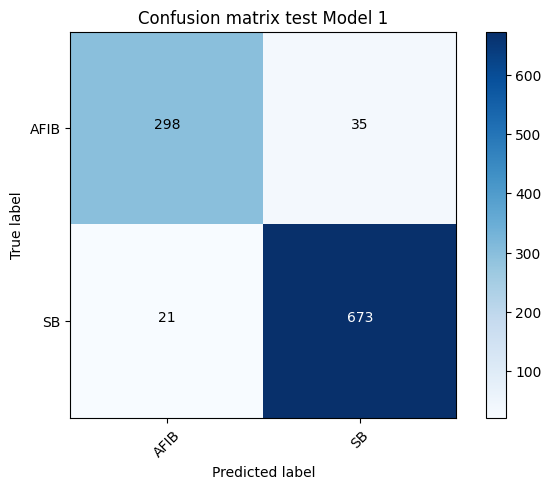

In [ ]:
#Matriz de confusion sin normalizar
mc_test_modelo1 = confusion_matrix(y_test,predict_test_modelo1)
plot_confusion_matrix(mc_test_modelo1, classes=target_names, title='Confusion matrix test Model 1')

Normalized confusion matrix
[[0.89489489 0.10510511]
 [0.03025937 0.96974063]]


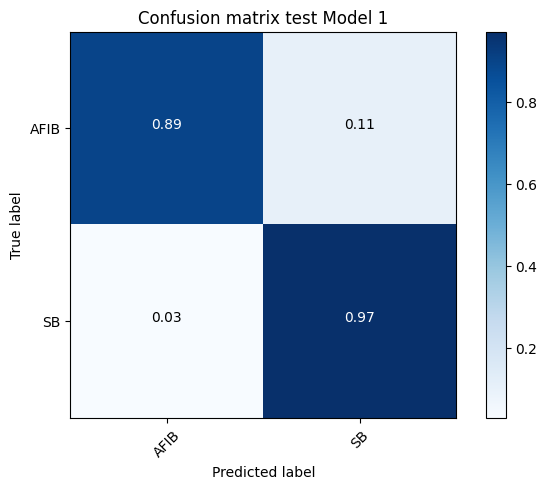

In [ ]:
#Matriz de confusion normalizada
mc_test_modelo1 = confusion_matrix(y_test,predict_test_modelo1)
plot_confusion_matrix(mc_test_modelo1, classes=target_names,normalize=True, title='Confusion matrix test Model 1')

## Estructura 2

In [ ]:
#Creacion del modelo
modelo_2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.025, solver = 'adam', batch_size=500, max_iter = 500, random_state = 123)

In [ ]:
#Entrenamiento del modelo
modelo_2.fit(x_train, y_train)
predict_train_modelo2 = modelo_2.predict(x_train)
predict_test_modelo2 = modelo_2.predict(x_test)

In [ ]:
#%% Results
print(confusion_matrix(y_test,predict_test_modelo2))

[[275  58]
 [ 14 680]]


In [ ]:
#Obtencion de algunas metricas de evaluacion
target_names = ['AFIB', 'SB']
reporte_modelo2=classification_report(y_test,predict_test_modelo2,target_names=target_names)
print(reporte_modelo2)
#print(classification_report(y_test,predict_test_modelo2,target_names=target_names))
accuracy_modelo2=accuracy_score(y_test,predict_test_modelo2)
print("accuracy modelo 2: ",accuracy_modelo2)

              precision    recall  f1-score   support

        AFIB       0.95      0.83      0.88       333
          SB       0.92      0.98      0.95       694

    accuracy                           0.93      1027
   macro avg       0.94      0.90      0.92      1027
weighted avg       0.93      0.93      0.93      1027

accuracy modelo 2:  0.9298928919182083


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# Obtener las métricas de clasificación
precision2, recall2, f1_score2, support2 = precision_recall_fscore_support(y_test, predict_test_modelo2, labels=target_names)

# Crear un diccionario con las métricas
reporte_dict_modelo2 = {
    'precision': precision2,
    'recall': recall2,
    'f1_score': f1_score2,
    'support': support2
}

Confusion matrix, without normalization
[[275  58]
 [ 14 680]]


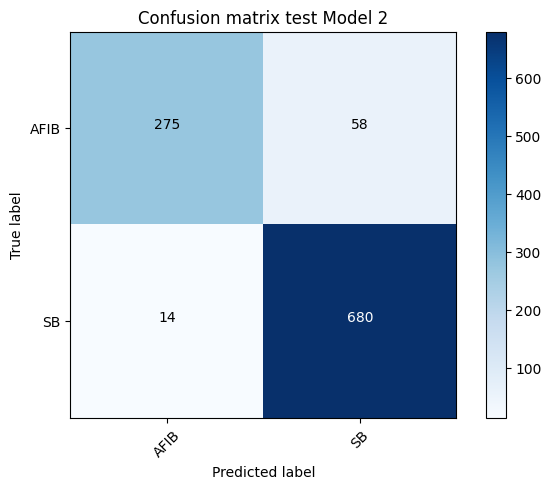

In [ ]:
#Matriz de confusion sin normalizar
mc_test_modelo2 = confusion_matrix(y_test,predict_test_modelo2)
plot_confusion_matrix(mc_test_modelo2, classes=target_names, title='Confusion matrix test Model 2')

Normalized confusion matrix
[[0.82582583 0.17417417]
 [0.02017291 0.97982709]]


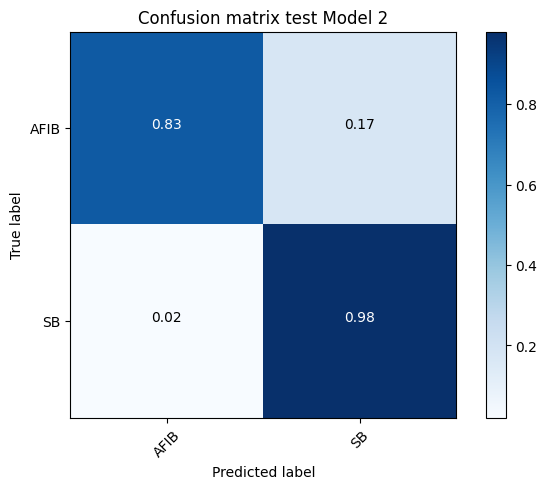

In [ ]:
#Matriz de confusion normalizada
mc_test_modelo2 = confusion_matrix(y_test,predict_test_modelo2)
plot_confusion_matrix(mc_test_modelo2, classes=target_names, normalize=True, title='Confusion matrix test Model 2')

## Estructura 3

Se realiza una grid search para la busqueda de los mejores hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
parametros = {
            'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20), (50, 50, 50)],
            'learning_rate_init': [0.01, 0.025, 0.05],
            'solver': ['adam', 'sgd','lbfgs'],
            'batch_size': [100, 200, 500],
            }
modelo_3 = MLPClassifier(max_iter=250, random_state=123)
grid_search_modelo_3 = GridSearchCV(estimator=modelo_3, param_grid=parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_modelo_3.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=250, random_state=123),
             n_jobs=-1,
             param_grid={'batch_size': [100, 200, 500],
                         'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20),
                                                (50, 50, 50)],
                         'learning_rate_init': [0.01, 0.025, 0.05],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='accuracy')

In [ ]:
grid_search_modelo_3.best_estimator_

MLPClassifier(batch_size=200, hidden_layer_sizes=(50, 50, 50),
              learning_rate_init=0.05, max_iter=250, random_state=123)

In [ ]:
grid_search_modelo_3.best_params_

{'batch_size': 200,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate_init': 0.05,
 'solver': 'adam'}

In [ ]:
# Obtener los mejores parámetros y el mejor modelo
print("Best parameters found: ", grid_search_modelo_3.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_modelo_3.best_score_))

best_model = grid_search_modelo_3.best_estimator_

# Evaluar el modelo en el conjunto de prueba
test_accuracy = best_model.score(x_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))

Best parameters found:  {'batch_size': 200, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.05, 'solver': 'adam'}
Best cross-validation score: 0.94
Test set accuracy: 0.93


In [ ]:
#Creacion del modelo
modelo_3 = MLPClassifier(batch_size=200, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.05, max_iter=500, random_state=123)

In [ ]:
#Entrenamiento del modelo
modelo_3.fit(x_train, y_train)
predict_train_modelo3 = modelo_3.predict(x_train)
predict_test_modelo3 = modelo_3.predict(x_test)

In [ ]:
#%% Results
print(confusion_matrix(y_test,predict_test_modelo3))

[[307  26]
 [ 41 653]]


In [ ]:
#Obtencion de algunas metricas de evaluacion
target_names = ['AFIB', 'SB']
reporte_modelo3=classification_report(y_test,predict_test_modelo3,target_names=target_names)
print(reporte_modelo3)
accuracy_modelo3=accuracy_score(y_test,predict_test_modelo3)
print("accuracy modelo 3: ",accuracy_modelo3)

              precision    recall  f1-score   support

        AFIB       0.88      0.92      0.90       333
          SB       0.96      0.94      0.95       694

    accuracy                           0.93      1027
   macro avg       0.92      0.93      0.93      1027
weighted avg       0.94      0.93      0.94      1027

accuracy modelo 3:  0.934761441090555


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# Obtener las métricas de clasificación
precision3, recall3, f1_score3, support3 = precision_recall_fscore_support(y_test, predict_test_modelo3, labels=target_names)

# Crear un diccionario con las métricas
reporte_dict_modelo3 = {
    'precision': precision3,
    'recall': recall3,
    'f1_score': f1_score3,
    'support': support3
}

Confusion matrix, without normalization
[[307  26]
 [ 41 653]]


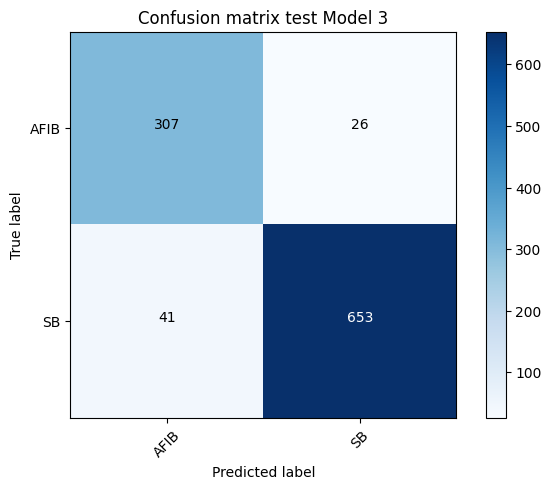

In [ ]:
#Matriz de confusion sin normalizar
mc_test_modelo3 = confusion_matrix(y_test,predict_test_modelo3)
plot_confusion_matrix(mc_test_modelo3, classes=target_names, title='Confusion matrix test Model 3')

Normalized confusion matrix
[[0.92192192 0.07807808]
 [0.05907781 0.94092219]]


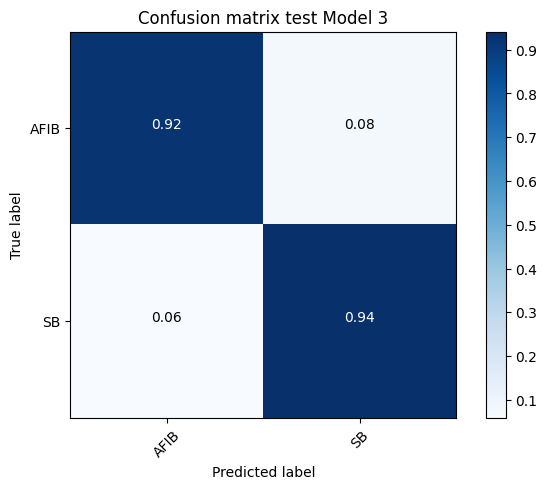

In [ ]:
#Matriz de confusion normalizada
mc_test_modelo3 = confusion_matrix(y_test,predict_test_modelo3)
plot_confusion_matrix(mc_test_modelo3, classes=target_names, normalize=True, title='Confusion matrix test Model 3')

DataFrame con las caracteristicas (hiperparametros) de cada modelo



In [ ]:
datos_modelos = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'hidden_layer_sizes': ['20, 20, 10','10, 10, 10','50, 50, 50'],
    'learning_rate_init':['0.01','0.025','0.05'],
    'solver':['lbfgs','adam','adam'],
    'batch_size':['-','500','200']
    }
df_datos_modelos = pd.DataFrame(datos_modelos)

In [ ]:
df_datos_modelos

,Modelo,hidden_layer_sizes,learning_rate_init,solver,batch_size
0,Modelo 1,"20, 20, 10",0.01,lbfgs,-
1,Modelo 2,"10, 10, 10",0.025,adam,500
2,Modelo 3,"50, 50, 50",0.05,adam,200


DataFrame con las las metricas obtenidas de cada modelo

In [ ]:
resultados_modelos = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'Accuracy': [accuracy_modelo1, accuracy_modelo2, accuracy_modelo3],
    'Precision AFIB': [reporte_dict_modelo1['precision'][0], reporte_dict_modelo2['precision'][0], reporte_dict_modelo3['precision'][0]],
    'Precision SB': [reporte_dict_modelo1['precision'][1], reporte_dict_modelo2['precision'][1], reporte_dict_modelo3['precision'][1]],
    'Recall AFIB': [reporte_dict_modelo1['recall'][0], reporte_dict_modelo2['recall'][0], reporte_dict_modelo3['recall'][0]],
    'Recall SB': [reporte_dict_modelo1['recall'][1], reporte_dict_modelo2['recall'][1], reporte_dict_modelo3['recall'][1]],
    'F1 Score AFIB': [reporte_dict_modelo1['f1_score'][0], reporte_dict_modelo2['f1_score'][0], reporte_dict_modelo3['f1_score'][0]],
    'F1 Score SB': [reporte_dict_modelo1['f1_score'][1], reporte_dict_modelo2['f1_score'][1], reporte_dict_modelo3['f1_score'][1]]
}
df_resultados_modelos = pd.DataFrame(resultados_modelos)

In [ ]:
df_resultados_modelos

,Modelo,Accuracy,Precision AFIB,Precision SB,Recall AFIB,Recall SB,F1 Score AFIB,F1 Score SB
0,Modelo 1,0.945472,0.934169,0.950565,0.894895,0.969741,0.914110,0.960057
1,Modelo 2,0.929893,0.951557,0.921409,0.825826,0.979827,0.884244,0.949721
2,Modelo 3,0.934761,0.882184,0.961708,0.921922,0.940922,0.901615,0.951202


# Punto 8

8. Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo de K means (10%) y máquinas de soporte vectorial (SVM) (10%)


In [ ]:
from sklearn.cluster import KMeans
datos_kmeans= DF_FINAL.copy()
datos_kmeans = datos_kmeans.drop(['Patología', 'Registro'], axis=1)
# Aplicar K-Means
kmeans = KMeans(n_clusters=2, max_iter=300, random_state= 111)
kmeans.fit(datos_kmeans)
y_kmeans = kmeans.predict(datos_kmeans)

cluster_mapping = {0: 'AFIB', 1: 'SB'}

# Crear una nueva columna 'Predicción' con las etiquetas asignadas
DF_FINAL['Predicción'] = [cluster_mapping[cluster] for cluster in y_kmeans]

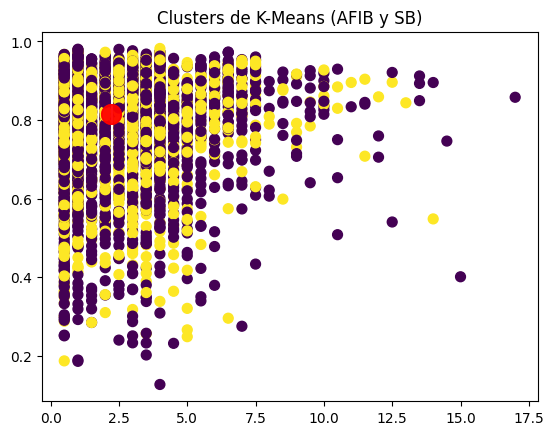

In [ ]:
import matplotlib.pyplot as plt

# Graficar los resultados
# Convert the DataFrame columns to NumPy arrays for plotting
x = datos_kmeans.iloc[:, 0].values  # Access the first column using .iloc and .values
y = datos_kmeans.iloc[:, 1].values  # Access the second column using .iloc and .values
plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters de K-Means (AFIB y SB)')
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

datos_SVC= DF_FINAL.copy()
X_SVC = datos_SVC.drop(['Patología', 'Registro','Predicción'], axis=1)
datos_SVC['Patología'] = datos_SVC['Patología'].replace({'AFIB': 1, 'SB': 0})
y_SVC = datos_SVC['Patología']

X_SVC = X_SVC.iloc[:, :2]  # Usar solo las dos primeras características para facilitar la visualización

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_SVC, y_SVC, test_size=0.3, random_state=0)

<ipython-input-161-1bc0d39a6c37>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_SVC['Patología'] = datos_SVC['Patología'].replace({'AFIB': 1, 'SB': 0})


Accuracy: 0.7501622323166774


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


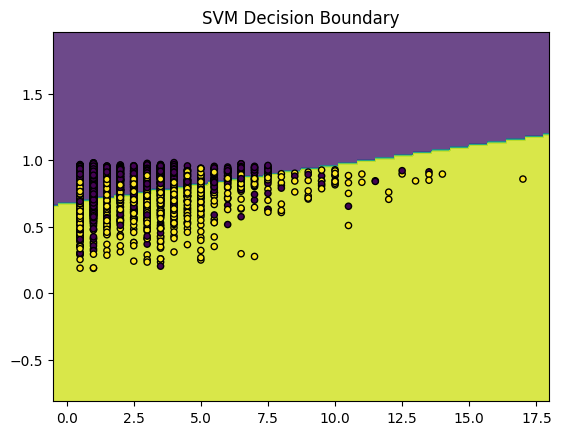

In [ ]:
# Entrenar el modelo SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Evaluar el modelo
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Función para graficar el hiperplano de decisión del SVM
def plot_svm_decision_boundary(model, X, y):
    h = .02  # Paso en la malla
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('SVM Decision Boundary')
    plt.show()

# Plotear los datos de entrenamiento y el hiperplano de decisión
plot_svm_decision_boundary(svm, X_train, y_train)


9. Hacer un informe con todos los puntos anteriores (10%). En el informe incluir: Consultar por lo menos tres equipos comerciales traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG (5%) y discutir brevemente las funcionalidades desde la teoría vista en el curso (5%)

El informe se encuentra en el archivo anexo llamado 'INFORME.pdf'